In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_colwidth', -1)

## Reading Demographic Data

In [2]:
#demo = pd.read_csv("F:\\UpGrad\\BFSI\\CredX_Case_study\\Demographic_data.csv",sep=",");
demo = pd.read_csv("Demographic data.csv",sep=",");

In [3]:
demo.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0


In [4]:
demo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 12 columns):
Application ID                                 71295 non-null int64
Age                                            71295 non-null int64
Gender                                         71293 non-null object
Marital Status (at the time of application)    71289 non-null object
No of dependents                               71292 non-null float64
Income                                         71295 non-null float64
Education                                      71176 non-null object
Profession                                     71281 non-null object
Type of residence                              71287 non-null object
No of months in current residence              71295 non-null int64
No of months in current company                71295 non-null int64
Performance Tag                                69870 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 6.5+ MB


In [5]:
#credit = pd.read_csv("F:\\UpGrad\\BFSI\\CredX_Case_study\\Credit Bureau data.csv", sep=",")
credit = pd.read_csv("Credit Bureau data.csv", sep=",")
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 19 columns):
Application ID                                                     71295 non-null int64
No of times 90 DPD or worse in last 6 months                       71295 non-null int64
No of times 60 DPD or worse in last 6 months                       71295 non-null int64
No of times 30 DPD or worse in last 6 months                       71295 non-null int64
No of times 90 DPD or worse in last 12 months                      71295 non-null int64
No of times 60 DPD or worse in last 12 months                      71295 non-null int64
No of times 30 DPD or worse in last 12 months                      71295 non-null int64
Avgas CC Utilization in last 12 months                             70237 non-null float64
No of trades opened in last 6 months                               71294 non-null float64
No of trades opened in last 12 months                              71295 non-null int64
No of P

In [6]:
#missing values in each file
demo.isnull().sum()

Application ID                                 0   
Age                                            0   
Gender                                         2   
Marital Status (at the time of application)    6   
No of dependents                               3   
Income                                         0   
Education                                      119 
Profession                                     14  
Type of residence                              8   
No of months in current residence              0   
No of months in current company                0   
Performance Tag                                1425
dtype: int64

In [7]:
round((100 * demo.isnull().sum())/len(demo.index),2)

Application ID                                 0.00
Age                                            0.00
Gender                                         0.00
Marital Status (at the time of application)    0.01
No of dependents                               0.00
Income                                         0.00
Education                                      0.17
Profession                                     0.02
Type of residence                              0.01
No of months in current residence              0.00
No of months in current company                0.00
Performance Tag                                2.00
dtype: float64

In [8]:
credit.isnull().sum()

Application ID                                                     0   
No of times 90 DPD or worse in last 6 months                       0   
No of times 60 DPD or worse in last 6 months                       0   
No of times 30 DPD or worse in last 6 months                       0   
No of times 90 DPD or worse in last 12 months                      0   
No of times 60 DPD or worse in last 12 months                      0   
No of times 30 DPD or worse in last 12 months                      0   
Avgas CC Utilization in last 12 months                             1058
No of trades opened in last 6 months                               1   
No of trades opened in last 12 months                              0   
No of PL trades opened in last 6 months                            0   
No of PL trades opened in last 12 months                           0   
No of Inquiries in last 6 months (excluding home & auto loans)     0   
No of Inquiries in last 12 months (excluding home & auto loans) 

In [9]:
round((100*credit.isnull().sum())/len(credit.index),2)

Application ID                                                     0.00
No of times 90 DPD or worse in last 6 months                       0.00
No of times 60 DPD or worse in last 6 months                       0.00
No of times 30 DPD or worse in last 6 months                       0.00
No of times 90 DPD or worse in last 12 months                      0.00
No of times 60 DPD or worse in last 12 months                      0.00
No of times 30 DPD or worse in last 12 months                      0.00
Avgas CC Utilization in last 12 months                             1.48
No of trades opened in last 6 months                               0.00
No of trades opened in last 12 months                              0.00
No of PL trades opened in last 6 months                            0.00
No of PL trades opened in last 12 months                           0.00
No of Inquiries in last 6 months (excluding home & auto loans)     0.00
No of Inquiries in last 12 months (excluding home & auto loans) 

In [10]:
demo.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0


In [11]:
demo.columns

Index(['Application ID', 'Age', 'Gender',
       'Marital Status (at the time of application)', 'No of dependents',
       'Income', 'Education', 'Profession ', 'Type of residence',
       'No of months in current residence', 'No of months in current company',
       'Performance Tag'],
      dtype='object')

## Data Quality Checks in Demographic file and Cleanup!

### Application ID

In [12]:
#check if any application id is unique
df = demo['Application ID']
df[df.duplicated(keep=False)]

5243     653287861
24386    765011468
27586    765011468
42637    653287861
48602    671989187
59022    671989187
Name: Application ID, dtype: int64

In [13]:
#deleting all such applciaiton Id's which are not unique

demo = demo.drop_duplicates(subset ="Application ID",keep = False)
demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71289 entries, 0 to 71294
Data columns (total 12 columns):
Application ID                                 71289 non-null int64
Age                                            71289 non-null int64
Gender                                         71287 non-null object
Marital Status (at the time of application)    71283 non-null object
No of dependents                               71286 non-null float64
Income                                         71289 non-null float64
Education                                      71170 non-null object
Profession                                     71275 non-null object
Type of residence                              71281 non-null object
No of months in current residence              71289 non-null int64
No of months in current company                71289 non-null int64
Performance Tag                                69864 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 7.1+ MB


### Age

In [14]:
#Validate Age
demo['Age'][demo['Age']<18].count()

65

In [15]:
#cleanup of such application whose age is less than 18 years
demo = demo[demo['Age']>=18]
demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71224 entries, 0 to 71294
Data columns (total 12 columns):
Application ID                                 71224 non-null int64
Age                                            71224 non-null int64
Gender                                         71223 non-null object
Marital Status (at the time of application)    71219 non-null object
No of dependents                               71222 non-null float64
Income                                         71224 non-null float64
Education                                      71105 non-null object
Profession                                     71211 non-null object
Type of residence                              71216 non-null object
No of months in current residence              71224 non-null int64
No of months in current company                71224 non-null int64
Performance Tag                                69799 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 7.1+ MB


### Gender

In [16]:
demo['Gender'].value_counts()

M    54402
F    16821
Name: Gender, dtype: int64

In [17]:
demo['Gender'].isnull().sum()

1

In [18]:
#remove such record where Gender is not available
demo = demo[~demo['Gender'].isnull()]
demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71223 entries, 0 to 71294
Data columns (total 12 columns):
Application ID                                 71223 non-null int64
Age                                            71223 non-null int64
Gender                                         71223 non-null object
Marital Status (at the time of application)    71218 non-null object
No of dependents                               71221 non-null float64
Income                                         71223 non-null float64
Education                                      71104 non-null object
Profession                                     71210 non-null object
Type of residence                              71215 non-null object
No of months in current residence              71223 non-null int64
No of months in current company                71223 non-null int64
Performance Tag                                69798 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 7.1+ MB


### Marital Status

In [19]:
demo['Marital Status (at the time of application)'].isnull().sum()

5

In [20]:
demo['Marital Status (at the time of application)'].value_counts()

Married    60684
Single     10534
Name: Marital Status (at the time of application), dtype: int64

In [21]:
# removing records which null marital status
demo = demo[~demo['Marital Status (at the time of application)'].isnull()]
demo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71218 entries, 0 to 71294
Data columns (total 12 columns):
Application ID                                 71218 non-null int64
Age                                            71218 non-null int64
Gender                                         71218 non-null object
Marital Status (at the time of application)    71218 non-null object
No of dependents                               71216 non-null float64
Income                                         71218 non-null float64
Education                                      71099 non-null object
Profession                                     71205 non-null object
Type of residence                              71210 non-null object
No of months in current residence              71218 non-null int64
No of months in current company                71218 non-null int64
Performance Tag                                69793 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 7.1+ MB


In [22]:
demo['No of dependents'].isnull().sum()

2

### No. of Dependents

In [23]:
demo['No of dependents'].value_counts()

3.0    16259
1.0    15368
2.0    15264
4.0    12215
5.0    12110
Name: No of dependents, dtype: int64

In [24]:
# Replacing the null values with zero
demo['No of dependents'].isnull().sum()

2

In [25]:
demo[demo['No of dependents'].isnull()] = 0

In [26]:
demo['No of dependents'].isnull().sum()

0

### Income

In [27]:
demo['Income'][demo['Income']<0].count()

80

In [28]:
# Removing all such rows having null or negative income
demo = demo[demo['Income']>0]

In [29]:
# Checking again
demo['Income'][demo['Income']<0].count()

0

### Education

In [30]:
demo['Education'].value_counts()

Professional    24757
Masters         23919
Bachelor        17658
Phd             4537 
Others          120  
Name: Education, dtype: int64

In [31]:
demo['Education'].isnull().sum()

119

The above column has 119 null values thus we have to use WOE on this.

### Profession

In [32]:
demo['Profession '].value_counts()

SAL        40333
SE_PROF    16489
SE         14276
Name: Profession , dtype: int64

In [33]:
demo['Profession '].isnull().sum()

12

In [34]:
# Removing rows having null values of profession
demo = demo[~demo['Profession '].isnull()]

In [35]:
demo['Profession '].isnull().sum()

0

### Residence_Type

In [36]:
demo['Type of residence'].value_counts()

Rented                 53271
Owned                  14195
Living with Parents    1800 
Company provided       1625 
Others                 199  
Name: Type of residence, dtype: int64

In [37]:
demo['Type of residence'].isnull().sum()

8

In [38]:
# Removing rows having null values
demo = demo[~demo['Type of residence'].isnull()]

In [39]:
demo['Type of residence'].isnull().sum()

0

In [40]:
## checking nulls across columns now
demo.isnull().sum()

Application ID                                 0   
Age                                            0   
Gender                                         0   
Marital Status (at the time of application)    0   
No of dependents                               0   
Income                                         0   
Education                                      119 
Profession                                     0   
Type of residence                              0   
No of months in current residence              0   
No of months in current company                0   
Performance Tag                                1424
dtype: int64

### Performance Tag

In [41]:
demo['Performance Tag'].value_counts()

0.0    66722
1.0    2944 
Name: Performance Tag, dtype: int64

In [42]:
demo['Performance Tag'].isnull().sum()

1424

## Data Quality Checks in Credit file and Cleanup

### No of trades opened in last 6 months

In [43]:
credit['No of trades opened in last 6 months'].value_counts()

1.0     20251
2.0     12462
0.0     12231
3.0     9851 
4.0     6624 
5.0     3791 
6.0     2349 
7.0     1649 
8.0     1154 
9.0     618  
10.0    238  
11.0    65   
12.0    11   
Name: No of trades opened in last 6 months, dtype: int64

In [44]:
credit['No of trades opened in last 6 months'].isnull().sum()

1

In [45]:
#Removing row having null value
credit = credit[~credit['No of trades opened in last 6 months'].isnull()]

In [46]:
#Checking the null values in credit
credit.isnull().sum()

Application ID                                                     0   
No of times 90 DPD or worse in last 6 months                       0   
No of times 60 DPD or worse in last 6 months                       0   
No of times 30 DPD or worse in last 6 months                       0   
No of times 90 DPD or worse in last 12 months                      0   
No of times 60 DPD or worse in last 12 months                      0   
No of times 30 DPD or worse in last 12 months                      0   
Avgas CC Utilization in last 12 months                             1057
No of trades opened in last 6 months                               0   
No of trades opened in last 12 months                              0   
No of PL trades opened in last 6 months                            0   
No of PL trades opened in last 12 months                           0   
No of Inquiries in last 6 months (excluding home & auto loans)     0   
No of Inquiries in last 12 months (excluding home & auto loans) 

## Data Modelling

### Data Modelling with Demographic Data only

In [47]:
# Copying the original demographic to a copy for Modelling
demo_model = demo.copy()
demo_model.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0


In [48]:
demo_model.shape

(71090, 12)

In [49]:
demo_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71090 entries, 0 to 71294
Data columns (total 12 columns):
Application ID                                 71090 non-null int64
Age                                            71090 non-null int64
Gender                                         71090 non-null object
Marital Status (at the time of application)    71090 non-null object
No of dependents                               71090 non-null float64
Income                                         71090 non-null float64
Education                                      70971 non-null object
Profession                                     71090 non-null object
Type of residence                              71090 non-null object
No of months in current residence              71090 non-null int64
No of months in current company                71090 non-null int64
Performance Tag                                69666 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 7.1+ MB


In [50]:
# Removing the null values from Performance Tag
demo_model = demo_model[~demo_model['Performance Tag'].isnull()]
demo_model.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0


In [51]:
# Removing the null values from Education
demo_model = demo_model[~demo_model['Education'].isnull()]
demo_model.head()

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0


In [52]:
# Creating dummy variables
gender = pd.get_dummies(demo_model['Gender'], prefix = 'Gender', drop_first = True)
marital_status = pd.get_dummies(demo_model['Marital Status (at the time of application)'], prefix = 'Marital Status (at the time of application)', drop_first = True)
education = pd.get_dummies(demo_model['Education'], prefix = 'Education', drop_first = True)
profession = pd.get_dummies(demo_model['Profession '], prefix = 'Profession ', drop_first = True)
residence_type = pd.get_dummies(demo_model['Type of residence'], prefix = 'Type of residence', drop_first = True)

#Concatinating
demo_model = pd.concat([demo_model, gender, marital_status, education, profession, residence_type], axis = 1)
# demo_model.head()
demo_model.drop(['Gender','Marital Status (at the time of application)','Education','Profession ','Type of residence'], axis = 1, inplace = True)

In [53]:
demo_model.head()

,Application ID,Age,No of dependents,Income,No of months in current residence,No of months in current company,Performance Tag,Gender_M,Marital Status (at the time of application)_Single,Education_Masters,Education_Others,Education_Phd,Education_Professional,Profession _SE,Profession _SE_PROF,Type of residence_Living with Parents,Type of residence_Others,Type of residence_Owned,Type of residence_Rented
0,954457215,48,2.0,40.0,113,56,0.0,0,0,0,0,0,0,0,0,0,0,0,1
1,432830445,31,4.0,55.0,112,46,0.0,1,0,0,0,0,1,0,1,0,0,0,1
2,941387308,32,2.0,46.0,104,49,0.0,1,1,0,0,0,0,0,1,0,0,0,1
3,392161677,43,1.0,53.0,94,53,0.0,1,0,0,0,0,0,1,0,0,0,0,1
4,182011211,35,5.0,44.0,112,43,0.0,0,0,0,0,0,1,0,0,0,0,0,1


In [54]:
#imports
from sklearn.model_selection import train_test_split

In [55]:
# Feature Variable
X = demo_model.drop(['Performance Tag', 'Application ID'], axis = 1)

# Response Variable
y = demo_model['Performance Tag']

In [56]:
# Splitting into train and test data
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)

## Standardisation

In [57]:
X_train.shape

(48683, 17)

In [58]:
X_train.head()

,Age,No of dependents,Income,No of months in current residence,No of months in current company,Gender_M,Marital Status (at the time of application)_Single,Education_Masters,Education_Others,Education_Phd,Education_Professional,Profession _SE,Profession _SE_PROF,Type of residence_Living with Parents,Type of residence_Others,Type of residence_Owned,Type of residence_Rented
17562,55,4.0,37.0,6,43,1,0,0,0,0,1,0,0,0,0,0,1
1736,33,3.0,40.0,44,55,1,1,0,0,0,1,1,0,0,0,0,1
26333,46,3.0,57.0,6,8,0,0,1,0,0,0,1,0,0,0,0,1
3567,45,1.0,16.0,69,44,1,0,0,0,0,0,0,1,0,0,0,1
26728,46,2.0,56.0,6,34,1,0,0,0,0,1,0,1,0,0,0,1


In [59]:
# Scaling
from sklearn.preprocessing import MinMaxScaler

In [60]:
Scaler = MinMaxScaler()

X_train[['Age', 'No of dependents', 'Income', 'No of months in current residence', 'No of months in current company']] = Scaler.fit_transform(X_train[['Age', 'No of dependents', 'Income', 'No of months in current residence', 'No of months in current company']])
X_train.head()

,Age,No of dependents,Income,No of months in current residence,No of months in current company,Gender_M,Marital Status (at the time of application)_Single,Education_Masters,Education_Others,Education_Phd,Education_Professional,Profession _SE,Profession _SE_PROF,Type of residence_Living with Parents,Type of residence_Others,Type of residence_Owned,Type of residence_Rented
17562,0.787234,0.75,0.610169,0.000000,0.307692,1,0,0,0,0,1,0,0,0,0,0,1
1736,0.319149,0.50,0.661017,0.316667,0.400000,1,1,0,0,0,1,1,0,0,0,0,1
26333,0.595745,0.50,0.949153,0.000000,0.038462,0,0,1,0,0,0,1,0,0,0,0,1
3567,0.574468,0.00,0.254237,0.525000,0.315385,1,0,0,0,0,0,0,1,0,0,0,1
26728,0.595745,0.25,0.932203,0.000000,0.238462,1,0,0,0,0,1,0,1,0,0,0,1


In [61]:
X_train.describe()

,Age,No of dependents,Income,No of months in current residence,No of months in current company,Gender_M,Marital Status (at the time of application)_Single,Education_Masters,Education_Others,Education_Phd,Education_Professional,Profession _SE,Profession _SE_PROF,Type of residence_Living with Parents,Type of residence_Others,Type of residence_Owned,Type of residence_Rented
count,48683.000000,48683.000000,48683.000000,48683.000000,48683.000000,48683.000000,48683.000000,48683.000000,48683.000000,48683.000000,48683.000000,48683.000000,48683.000000,48683.000000,48683.000000,48683.000000,48683.000000
mean,0.575787,0.465614,0.448202,0.235668,0.239910,0.763162,0.147937,0.337469,0.001684,0.063575,0.349362,0.199762,0.234250,0.024649,0.002814,0.202658,0.747201
std,0.210018,0.347398,0.261408,0.306191,0.156482,0.425147,0.355041,0.472851,0.041007,0.243996,0.476773,0.399825,0.423534,0.155055,0.052974,0.401984,0.434621
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.425532,0.250000,0.220339,0.000000,0.107692,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.574468,0.500000,0.440678,0.025000,0.238462,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.744681,0.750000,0.661017,0.450000,0.369231,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


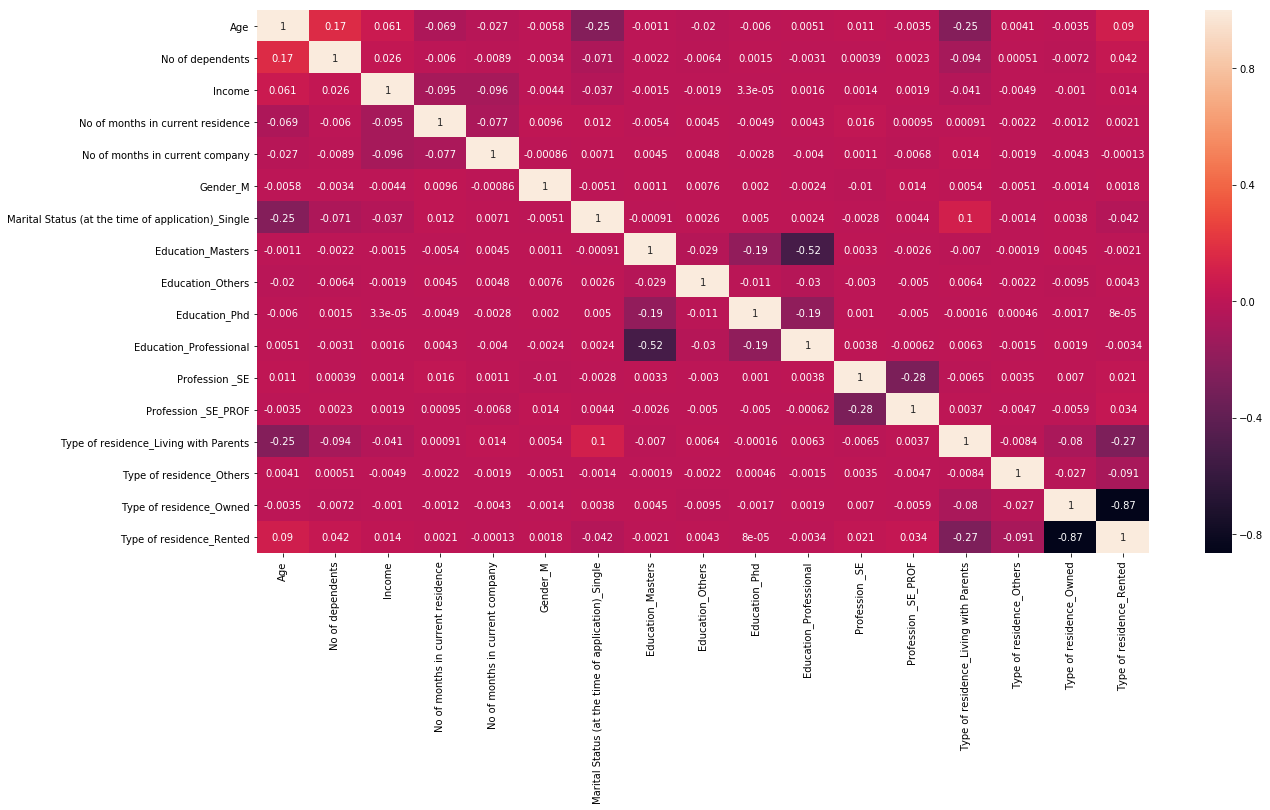

In [62]:
# finding the correlations
plt.figure(figsize = (20,10))
sns.heatmap(X_train.corr(), annot = True)
plt.show()

## Logistic Regression

In [63]:
# imports 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [64]:
y_train.isnull().sum()

0

In [65]:
logRegression = LogisticRegression(random_state = 101, class_weight = 'balanced')

rfe_m = RFE(logRegression,10)
rfe_m = rfe_m.fit(X_train, y_train)

In [66]:
# Support Variables
list(zip(X_train.columns, rfe_m.support_, rfe_m.ranking_))

[('Age', True, 1),
 ('No of dependents', False, 2),
 ('Income', True, 1),
 ('No of months in current residence', True, 1),
 ('No of months in current company', True, 1),
 ('Gender_M', False, 6),
 ('Marital Status (at the time of application)_Single', False, 8),
 ('Education_Masters', False, 7),
 ('Education_Others', True, 1),
 ('Education_Phd', False, 5),
 ('Education_Professional', False, 3),
 ('Profession _SE', True, 1),
 ('Profession _SE_PROF', False, 4),
 ('Type of residence_Living with Parents', True, 1),
 ('Type of residence_Others', True, 1),
 ('Type of residence_Owned', True, 1),
 ('Type of residence_Rented', True, 1)]

In [67]:
columns = X_train.columns[rfe_m.support_]
columns

Index(['Age', 'Income', 'No of months in current residence',
       'No of months in current company', 'Education_Others', 'Profession _SE',
       'Type of residence_Living with Parents', 'Type of residence_Others',
       'Type of residence_Owned', 'Type of residence_Rented'],
      dtype='object')

In [68]:
import statsmodels.api as sm

X_train_smdl = sm.add_constant(X_train[columns])
log_m1 = sm.GLM(y_train, X_train_smdl, family = sm.families.Binomial())
res = log_m1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48683
Model:                            GLM   Df Residuals:                    48672
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8494.6
Date:                Mon, 25 May 2020   Deviance:                       16989.
Time:                        18:26:40   Pearson chi2:                 4.87e+04
No. Iterations:                     8   Covariance Type:             nonrobust
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -2.5735      0.165    -15.571      0.000      -2.897      -2.250
Age                                       0.1013      0.110      0.923      0.356      -0.114       0.316
Income                                   -0.8328      0.089     -9.320      0.000      -1.008      -0.658
No of months in current residence         0.1247      0.073      1.715      0.086      -0.018       0.267
No of months in current company          -0.6109      0.146     -4.186      0.000      -0.897      -0.325
Education_Others                          0.3848      0.463      0.831      0.406      -0.523       1.292
Profession _SE                            0.1264      0.055      2.310      0.021       0.019       0.234
Type of residence_Living with Parents    -0.1090      0.202     -0.540      0.589      -0.505       0.287
Type of residence_Others                 -1.9813      1.014     -1.954      0.051      -3.968       0.006
Type of residence_Owned                  -0.1967      0.150     -1.308      0.191      -0.491       0.098
Type of residence_Rented                 -0.1568      0.144     -1.090      0.276      -0.439       0.125
=========================================================================================================
"""

In [69]:
#import
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Checking VIF
vif = pd.DataFrame()
X = X_train_smdl
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,59.47
10,Type of residence_Rented,8.63
9,Type of residence_Owned,7.97
7,Type of residence_Living with Parents,2.11
8,Type of residence_Others,1.12
1,Age,1.07
2,Income,1.02
3,No of months in current residence,1.02
4,No of months in current company,1.02
6,Profession _SE,1.01


In [70]:
#Dropping the column "Type of residence_Living with Parents" and creating the model again

columns = columns.drop ('Type of residence_Living with Parents',1)

In [71]:
X_train_smdl = sm.add_constant(X_train[columns])
log_m2 = sm.GLM(y_train, X_train_smdl, family = sm.families.Binomial())
res = log_m2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48683
Model:                            GLM   Df Residuals:                    48673
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8494.7
Date:                Mon, 25 May 2020   Deviance:                       16989.
Time:                        18:26:42   Pearson chi2:                 4.87e+04
No. Iterations:                     8   Covariance Type:             nonrobust
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -2.6345      0.122    -21.520      0.000      -2.874      -2.395
Age                                   0.1119      0.108      1.035      0.301      -0.100       0.324
Income                               -0.8318      0.089     -9.310      0.000      -1.007      -0.657
No of months in current residence     0.1252      0.073      1.721      0.085      -0.017       0.268
No of months in current company      -0.6111      0.146     -4.188      0.000      -0.897      -0.325
Education_Others                      0.3865      0.463      0.835      0.404      -0.521       1.294
Profession _SE                        0.1247      0.055      2.284      0.022       0.018       0.232
Type of residence_Others             -1.9266      1.009     -1.910      0.056      -3.904       0.051
Type of residence_Owned              -0.1418      0.113     -1.255      0.210      -0.363       0.080
Type of residence_Rented             -0.1022      0.105     -0.977      0.328      -0.307       0.103
=====================================================================================================
"""

In [72]:
# Checking VIF
vif = pd.DataFrame()
X = X_train_smdl
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,31.91
9,Type of residence_Rented,4.40
8,Type of residence_Owned,4.33
7,Type of residence_Others,1.06
1,Age,1.04
2,Income,1.02
3,No of months in current residence,1.02
4,No of months in current company,1.02
5,Education_Others,1.00
6,Profession _SE,1.00


In [73]:
# Dropping the column "Education_Others" and recreating the model
columns = columns.drop ('Education_Others',1)

In [74]:
X_train_smdl = sm.add_constant(X_train[columns])
log_m2 = sm.GLM(y_train, X_train_smdl, family = sm.families.Binomial())
res = log_m2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48683
Model:                            GLM   Df Residuals:                    48674
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8495.0
Date:                Mon, 25 May 2020   Deviance:                       16990.
Time:                        18:26:42   Pearson chi2:                 4.87e+04
No. Iterations:                     8   Covariance Type:             nonrobust
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -2.6325      0.122    -21.510      0.000      -2.872      -2.393
Age                                   0.1101      0.108      1.019      0.308      -0.102       0.322
Income                               -0.8317      0.089     -9.310      0.000      -1.007      -0.657
No of months in current residence     0.1254      0.073      1.724      0.085      -0.017       0.268
No of months in current company      -0.6105      0.146     -4.184      0.000      -0.897      -0.325
Profession _SE                        0.1246      0.055      2.282      0.022       0.018       0.232
Type of residence_Others             -1.9278      1.009     -1.911      0.056      -3.905       0.050
Type of residence_Owned              -0.1426      0.113     -1.262      0.207      -0.364       0.079
Type of residence_Rented             -0.1025      0.105     -0.981      0.327      -0.307       0.102
=====================================================================================================
"""

In [75]:
# Checking VIF
vif = pd.DataFrame()
X = X_train_smdl
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,31.90
8,Type of residence_Rented,4.40
7,Type of residence_Owned,4.33
6,Type of residence_Others,1.06
1,Age,1.04
2,Income,1.02
3,No of months in current residence,1.02
4,No of months in current company,1.02
5,Profession _SE,1.00


In [76]:
# Dropping the column "Type of residence_Rented" and recreating the model
columns = columns.drop ('Type of residence_Rented',1)

In [77]:
X_train_smdl = sm.add_constant(X_train[columns])
log_m2 = sm.GLM(y_train, X_train_smdl, family = sm.families.Binomial())
res = log_m2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48683
Model:                            GLM   Df Residuals:                    48675
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8495.5
Date:                Mon, 25 May 2020   Deviance:                       16991.
Time:                        18:26:43   Pearson chi2:                 4.87e+04
No. Iterations:                     8   Covariance Type:             nonrobust
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -2.7164      0.088    -30.742      0.000      -2.890      -2.543
Age                                   0.0909      0.106      0.855      0.392      -0.117       0.299
Income                               -0.8328      0.089     -9.324      0.000      -1.008      -0.658
No of months in current residence     0.1245      0.073      1.712      0.087      -0.018       0.267
No of months in current company      -0.6101      0.146     -4.181      0.000      -0.896      -0.324
Profession _SE                        0.1215      0.055      2.229      0.026       0.015       0.228
Type of residence_Others             -1.8311      1.004     -1.824      0.068      -3.799       0.137
Type of residence_Owned              -0.0465      0.057     -0.820      0.412      -0.157       0.065
=====================================================================================================
"""

In [78]:
# Checking VIF
vif = pd.DataFrame()
X = X_train_smdl
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,16.11
2,Income,1.02
3,No of months in current residence,1.02
4,No of months in current company,1.02
1,Age,1.01
5,Profession _SE,1.00
6,Type of residence_Others,1.00
7,Type of residence_Owned,1.00


In [79]:
# Dropping the column "Type of residence_Owned" and recreating the model
columns = columns.drop ('Type of residence_Owned',1)

In [80]:
X_train_smdl = sm.add_constant(X_train[columns])
log_m2 = sm.GLM(y_train, X_train_smdl, family = sm.families.Binomial())
res = log_m2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48683
Model:                            GLM   Df Residuals:                    48676
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8495.8
Date:                Mon, 25 May 2020   Deviance:                       16992.
Time:                        18:26:43   Pearson chi2:                 4.88e+04
No. Iterations:                     8   Covariance Type:             nonrobust
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -2.7259      0.088    -31.114      0.000      -2.898      -2.554
Age                                   0.0913      0.106      0.859      0.391      -0.117       0.300
Income                               -0.8328      0.089     -9.323      0.000      -1.008      -0.658
No of months in current residence     0.1246      0.073      1.713      0.087      -0.018       0.267
No of months in current company      -0.6097      0.146     -4.178      0.000      -0.896      -0.324
Profession _SE                        0.1212      0.055      2.223      0.026       0.014       0.228
Type of residence_Others             -1.8218      1.004     -1.814      0.070      -3.790       0.146
=====================================================================================================
"""

In [81]:
# Checking VIF
vif = pd.DataFrame()
X = X_train_smdl
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,15.84
2,Income,1.02
3,No of months in current residence,1.02
4,No of months in current company,1.02
1,Age,1.01
5,Profession _SE,1.00
6,Type of residence_Others,1.00


In [82]:
# Dropping the column "Age" and recreating the model
columns = columns.drop ('Age',1)

In [83]:
X_train_smdl = sm.add_constant(X_train[columns])
log_m2 = sm.GLM(y_train, X_train_smdl, family = sm.families.Binomial())
res = log_m2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48683
Model:                            GLM   Df Residuals:                    48677
Model Family:                Binomial   Df Model:                            5
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8496.2
Date:                Mon, 25 May 2020   Deviance:                       16992.
Time:                        18:26:44   Pearson chi2:                 4.88e+04
No. Iterations:                     8   Covariance Type:             nonrobust
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                                -2.6730      0.062    -43.085      0.000      -2.795      -2.551
Income                               -0.8298      0.089     -9.293      0.000      -1.005      -0.655
No of months in current residence     0.1207      0.073      1.664      0.096      -0.022       0.263
No of months in current company      -0.6130      0.146     -4.202      0.000      -0.899      -0.327
Profession _SE                        0.1218      0.054      2.235      0.025       0.015       0.229
Type of residence_Others             -1.8205      1.004     -1.813      0.070      -3.788       0.148
=====================================================================================================
"""

In [84]:
# Checking VIF
vif = pd.DataFrame()
X = X_train_smdl
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,8.27
1,Income,1.02
2,No of months in current residence,1.02
3,No of months in current company,1.02
4,Profession _SE,1.00
5,Type of residence_Others,1.00


In [85]:
# Dropping the column "No of months in current residence" and recreating the model
columns = columns.drop ('No of months in current residence',1)

In [86]:
X_train_smdl = sm.add_constant(X_train[columns])
log_m2 = sm.GLM(y_train, X_train_smdl, family = sm.families.Binomial())
res = log_m2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48683
Model:                            GLM   Df Residuals:                    48678
Model Family:                Binomial   Df Model:                            4
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8497.6
Date:                Mon, 25 May 2020   Deviance:                       16995.
Time:                        18:26:45   Pearson chi2:                 4.87e+04
No. Iterations:                     8   Covariance Type:             nonrobust
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -2.6318      0.057    -46.384      0.000      -2.743      -2.521
Income                             -0.8456      0.089     -9.521      0.000      -1.020      -0.672
No of months in current company    -0.6354      0.145     -4.376      0.000      -0.920      -0.351
Profession _SE                      0.1235      0.054      2.267      0.023       0.017       0.230
Type of residence_Others           -1.8230      1.004     -1.816      0.069      -3.791       0.145
===================================================================================================
"""

In [87]:
# Checking VIF
vif = pd.DataFrame()
X = X_train_smdl
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,7.10
1,Income,1.01
2,No of months in current company,1.01
3,Profession _SE,1.00
4,Type of residence_Others,1.00


In [88]:
# Dropping the column "Type of residence_Others" and recreating the model
columns = columns.drop ('Type of residence_Others',1)

In [89]:
X_train_smdl = sm.add_constant(X_train[columns])
log_m2 = sm.GLM(y_train, X_train_smdl, family = sm.families.Binomial())
res = log_m2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48683
Model:                            GLM   Df Residuals:                    48679
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8500.8
Date:                Mon, 25 May 2020   Deviance:                       17002.
Time:                        18:26:45   Pearson chi2:                 4.88e+04
No. Iterations:                     6   Covariance Type:             nonrobust
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -2.6345      0.057    -46.423      0.000      -2.746      -2.523
Income                             -0.8451      0.089     -9.513      0.000      -1.019      -0.671
No of months in current company    -0.6350      0.145     -4.373      0.000      -0.920      -0.350
Profession _SE                      0.1229      0.054      2.256      0.024       0.016       0.230
===================================================================================================
"""

In [90]:
# Checking VIF
vif = pd.DataFrame()
X = X_train_smdl
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,7.09
1,Income,1.01
2,No of months in current company,1.01
3,Profession _SE,1.00


Now in the above model all the variables has significant p values and the VIF are also in range.

##### Model Evaluation

In [91]:
final_cols =[x for x in columns]
final_cols

['Income', 'No of months in current company', 'Profession _SE']

In [92]:
y_train_pred = res.predict(sm.add_constant(X_train[columns]))
y_train_pred[:10]

17562    0.034041
1736     0.034750
26333    0.034285
3567     0.045233
26728    0.027285
45258    0.051744
31431    0.031633
10648    0.034327
5426     0.036856
20201    0.053629
dtype: float64

In [93]:
#Creating a dataframne containing the converted flag
y_train_pred_2 = pd.DataFrame({'Converted': y_train.values, 'Conversion_Prob': y_train_pred})
y_train_pred_2.head()

,Converted,Conversion_Prob
17562,0.0,0.034041
1736,0.0,0.034750
26333,0.0,0.034285
3567,0.0,0.045233
26728,0.0,0.027285


In [94]:
#Creating a new columns 'Predcited' having values 1 if paid_prob > 0.5 else 0
y_train_pred_2['Predicted'] = y_train_pred_2.Conversion_Prob.map(lambda x:1 if x>0.5 else 0)
y_train_pred_2.head()

,Converted,Conversion_Prob,Predicted
17562,0.0,0.034041,0
1736,0.0,0.034750,0
26333,0.0,0.034285,0
3567,0.0,0.045233,0
26728,0.0,0.027285,0


In [95]:
#Columns with different probability cutoffs
num = [float(x)/10 for x in range(10)]
for i in num:
    y_train_pred_2[i] = y_train_pred_2.Conversion_Prob.map(lambda x: 1 if x > i else 0)

y_train_pred_2.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
17562,0.0,0.034041,0,1,0,0,0,0,0,0,0,0,0
1736,0.0,0.034750,0,1,0,0,0,0,0,0,0,0,0
26333,0.0,0.034285,0,1,0,0,0,0,0,0,0,0,0
3567,0.0,0.045233,0,1,0,0,0,0,0,0,0,0,0
26728,0.0,0.027285,0,1,0,0,0,0,0,0,0,0,0


In [96]:
from sklearn import metrics

In [97]:
# Creating a dataframe to analyse the values of accuracy, sensitivity, and specificity.

Prob_cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

numbers = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in numbers:
    cm1 = metrics.confusion_matrix(y_train_pred_2.Converted, y_train_pred_2[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    Prob_cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(Prob_cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0  0.0          0.042479  1.0          0.0        
0.1  0.1          0.957521  0.0          1.0        
0.2  0.2          0.957521  0.0          1.0        
0.3  0.3          0.957521  0.0          1.0        
0.4  0.4          0.957521  0.0          1.0        
0.5  0.5          0.957521  0.0          1.0        
0.6  0.6          0.957521  0.0          1.0        
0.7  0.7          0.957521  0.0          1.0        
0.8  0.8          0.957521  0.0          1.0        
0.9  0.9          0.957521  0.0          1.0        


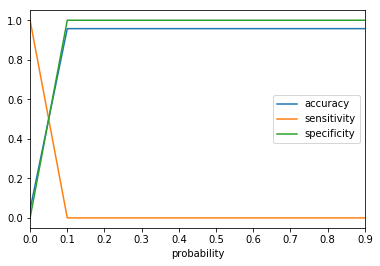

In [98]:
Prob_cutoff_df.plot.line(x = 'probability', y = ['accuracy', 'sensitivity', 'specificity'])
plt.show()

#Around 0.05 is the optimal values of the three metrics. Therefore our cutoff is now 0.05

In [99]:
y_train_pred_2['final_prediction'] = y_train_pred_2.Conversion_Prob.map(lambda x: 1 if x > 0.05 else 0)
y_train_pred_2.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_prediction
17562,0.0,0.034041,0,1,0,0,0,0,0,0,0,0,0,0
1736,0.0,0.034750,0,1,0,0,0,0,0,0,0,0,0,0
26333,0.0,0.034285,0,1,0,0,0,0,0,0,0,0,0,0
3567,0.0,0.045233,0,1,0,0,0,0,0,0,0,0,0,0
26728,0.0,0.027285,0,1,0,0,0,0,0,0,0,0,0,0


In [100]:
# Accuracy
print(metrics.accuracy_score(y_train_pred_2.Converted,y_train_pred_2.Predicted ))

# Confusion Metrix
confusion_metrics_2 = metrics.confusion_matrix(y_train_pred_2.Converted, y_train_pred_2.final_prediction)
print(confusion_metrics_2)

# Other metrics
TP = confusion_metrics_2[1,1]
TN = confusion_metrics_2[0,0]
FP = confusion_metrics_2[0,1]
FN = confusion_metrics_2[1,0]

# Sensitivity
print(TP / (TP+FN))

# Specificity
print(TN / (TN+FP))


0.9575211059302015
[[36060 10555]
 [ 1441   627]]
0.30319148936170215
0.7735707390325003


## Master File

In [101]:
#create a master file combining both demographic and credit Bereau details
master_loan = demo.merge(credit, on='Application ID')
master_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71089 entries, 0 to 71088
Data columns (total 30 columns):
Application ID                                                     71089 non-null int64
Age                                                                71089 non-null int64
Gender                                                             71089 non-null object
Marital Status (at the time of application)                        71089 non-null object
No of dependents                                                   71089 non-null float64
Income                                                             71089 non-null float64
Education                                                          70970 non-null object
Profession                                                         71089 non-null object
Type of residence                                                  71089 non-null object
No of months in current residence                                  71089 non-null int64
No

In [102]:
df = demo['Application ID']
df[df.duplicated(keep=False)]

Series([], Name: Application ID, dtype: int64)

In [103]:
# Null values
master_loan.isnull().sum()

Application ID                                                     0   
Age                                                                0   
Gender                                                             0   
Marital Status (at the time of application)                        0   
No of dependents                                                   0   
Income                                                             0   
Education                                                          119 
Profession                                                         0   
Type of residence                                                  0   
No of months in current residence                                  0   
No of months in current company                                    0   
Performance Tag_x                                                  1424
No of times 90 DPD or worse in last 6 months                       0   
No of times 60 DPD or worse in last 6 months                    

In [104]:
# Dropping the Application_ID column as it is arbitrary and can't be used
master_loan.drop(['Application ID'], axis =1, inplace = True)

In [105]:
# Binning the continuous value columns into 5 bins
master_loan['Age'] = pd.qcut(master_loan['Age'], 8)
master_loan['Income'] = pd.qcut(master_loan['Income'],8)
master_loan['No of months in current residence'] = pd.qcut(master_loan['No of months in current residence'].rank(method='first'),8)
master_loan['No of months in current company'] = pd.qcut(master_loan['No of months in current company'].rank(method='first'),8)
master_loan.drop(['Age', 'Income','No of months in current residence','No of months in current company'], axis = 1, inplace = True)

In [106]:
master_loan.head()

,Gender,Marital Status (at the time of application),No of dependents,Education,Profession,Type of residence,Performance Tag_x,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag_y
0,F,Married,2.0,Bachelor,SAL,Rented,0.0,0,0,0,0,0,0,4.0,1.0,2,0,0,0,0,1.0,2999395.0,4,0,0.0
1,M,Married,4.0,Professional,SE_PROF,Rented,0.0,0,0,0,0,0,0,3.0,1.0,2,0,0,0,0,0.0,3078.0,5,0,0.0
2,M,Single,2.0,Bachelor,SE_PROF,Rented,0.0,0,0,0,0,0,0,7.0,0.0,0,0,0,0,0,1.0,3004972.0,2,0,0.0
3,M,Married,1.0,Bachelor,SE,Rented,0.0,0,0,0,0,0,0,11.0,1.0,1,0,0,0,0,1.0,3355373.0,4,1,0.0
4,F,Married,5.0,Professional,SAL,Rented,0.0,0,0,0,0,0,0,12.0,0.0,1,0,0,0,0,1.0,3014283.0,4,0,0.0


In [107]:
# Removing the null values in Performance Tags.
master_loan['Performance Tag_x'].isnull().sum()

1424

In [108]:
master_loan['Performance Tag_y'].isnull().sum()

1424

In [109]:
master_loan = master_loan[~master_loan['Performance Tag_x'].isnull()]

In [110]:
master_loan = master_loan[~master_loan['Performance Tag_y'].isnull()]

In [111]:
# There should be no imputed data for different Performance Tag
master_loan[~(master_loan['Performance Tag_x'] == master_loan['Performance Tag_y'])]

,Gender,Marital Status (at the time of application),No of dependents,Education,Profession,Type of residence,Performance Tag_x,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag_y


All the performance Tag of Demographic and Credit data are same. Thus removing Performance Tag_y column

In [112]:
master_loan = master_loan.drop(['Performance Tag_y'], axis = 1)
master_loan = master_loan.rename({'Performance Tag_x' : 'Performance Tag'}, axis = 1)
master_loan.head()

,Gender,Marital Status (at the time of application),No of dependents,Education,Profession,Type of residence,Performance Tag,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan
0,F,Married,2.0,Bachelor,SAL,Rented,0.0,0,0,0,0,0,0,4.0,1.0,2,0,0,0,0,1.0,2999395.0,4,0
1,M,Married,4.0,Professional,SE_PROF,Rented,0.0,0,0,0,0,0,0,3.0,1.0,2,0,0,0,0,0.0,3078.0,5,0
2,M,Single,2.0,Bachelor,SE_PROF,Rented,0.0,0,0,0,0,0,0,7.0,0.0,0,0,0,0,0,1.0,3004972.0,2,0
3,M,Married,1.0,Bachelor,SE,Rented,0.0,0,0,0,0,0,0,11.0,1.0,1,0,0,0,0,1.0,3355373.0,4,1
4,F,Married,5.0,Professional,SAL,Rented,0.0,0,0,0,0,0,0,12.0,0.0,1,0,0,0,0,1.0,3014283.0,4,0


In [113]:
def calculate_woe_iv(data, target, bins=8, show_woe=False):
    
    #Empty Dataframe
    iv,woe = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        null_data = data[data[ivars].isnull()]
        nonnull_data = data[data[ivars].notnull()]
        
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>8):            
            binned_x = pd.qcut(nonnull_data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': nonnull_data[target]})
        else:
            d0 = pd.DataFrame({'x': nonnull_data[ivars], 'y': nonnull_data[target]})
            
        if(~null_data.empty):
            d1 = pd.DataFrame({'x' : 'NULL', 'y' : null_data[target]})
            d0 = pd.concat([d0, d1], axis = 0)
            
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Defaults']                
        d['% of Defaults'] = np.maximum(d['Defaults'], 0.5) / d['Defaults'].sum()
        d['Non-Defaults'] = d['N'] - d['Defaults']
        d['% of Non-Defaults'] = np.maximum(d['Non-Defaults'], 0.5) / d['Non-Defaults'].sum()
        d['WoE'] = np.log(d['% of Defaults']/d['% of Non-Defaults'])
        d['IV'] = round(d['WoE'] * (d['% of Defaults'] - d['% of Non-Defaults']),6)
        d.insert(loc=0, column='Variable', value=ivars)
        print("IV of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        iv=pd.concat([iv,temp], axis=0)
        woe=pd.concat([woe,d], axis=0)

        woe['min_val']=0
        woe['max_val']=0
        for cols in np.unique(woe.Variable):
            if (data[cols].dtype.kind in 'bifc') and (len(np.unique(data[cols]))>8):
                woe.loc[(woe.Variable==cols) & (woe.Cutoff!='NULL'),'min_val'
                         ] = woe[woe.Variable==cols
                                  ]['Cutoff'].apply(lambda x: 0 if x=='NULL' else float(str(x).split(',')[0].split('(')[1].strip()))
                woe.loc[(woe.Variable==cols) & (woe.Cutoff!='NULL'),'max_val'
                         ] = woe[woe.Variable==cols
                                  ]['Cutoff'].apply(lambda x: 0 if x=='NULL' else float(str(x).split(',')[1].split(']')[0].strip()))


        #Show WOE Table
        if show_woe == True:
            print(d)
    return iv, woe

In [114]:
iv, woe = calculate_woe_iv(data =master_loan,target = 'Performance Tag',bins=8, show_woe = True)

IV of Gender is 0.000341
  Variable Cutoff      N  Defaults  % of Defaults  Non-Defaults  \
0  Gender   F      16464  718.0     0.243886       15746.0        
1  Gender   M      53201  2226.0    0.756114       50975.0        

   % of Non-Defaults       WoE        IV  
0  0.235998           0.032878  0.000259  
1  0.764002          -0.010379  0.000082  
IV of Marital Status (at the time of application) is 9.3e-05
                                      Variable   Cutoff      N  Defaults  \
0  Marital Status (at the time of application)  Married  59388  2500.0     
1  Marital Status (at the time of application)  Single   10277  444.0      

   % of Defaults  Non-Defaults  % of Non-Defaults       WoE        IV  
0  0.849185       56888.0       0.852625          -0.004043  0.000014  
1  0.150815       9833.0        0.147375           0.023076  0.000079  
IV of No of dependents is 0.002612
           Variable  Cutoff      N  Defaults  % of Defaults  Non-Defaults  \
0  No of dependents  1.0  

                                        Variable  Cutoff      N  Defaults  \
0  No of times 60 DPD or worse in last 12 months  0       45698  1375.0     
1  No of times 60 DPD or worse in last 12 months  1       12798  663.0      
2  No of times 60 DPD or worse in last 12 months  2       6409   482.0      
3  No of times 60 DPD or worse in last 12 months  3       3200   274.0      
4  No of times 60 DPD or worse in last 12 months  4       1044   101.0      
5  No of times 60 DPD or worse in last 12 months  5       398    36.0       
6  No of times 60 DPD or worse in last 12 months  6       111    13.0       
7  No of times 60 DPD or worse in last 12 months  7       7      0.0        

   % of Defaults  Non-Defaults  % of Non-Defaults       WoE        IV  
0  0.467052       44323.0       0.664304          -0.352299  0.069492  
1  0.225204       12135.0       0.181877           0.213676  0.009258  
2  0.163723       5927.0        0.088833           0.611421  0.045789  
3  0.093071       

IV of No of Inquiries in last 6 months (excluding home & auto loans) is 0.112964
                                                         Variable  \
0  No of Inquiries in last 6 months (excluding home & auto loans)   
1  No of Inquiries in last 6 months (excluding home & auto loans)   
2  No of Inquiries in last 6 months (excluding home & auto loans)   
3  No of Inquiries in last 6 months (excluding home & auto loans)   
4  No of Inquiries in last 6 months (excluding home & auto loans)   

          Cutoff      N  Defaults  % of Defaults  Non-Defaults  \
0  (-0.001, 1.0]  38075  1182.0    0.401495       36893.0        
1  (1.0, 2.0]     12818  665.0     0.225883       12153.0        
2  (2.0, 3.0]     7245   517.0     0.175611       6728.0         
3  (3.0, 4.0]     4245   269.0     0.091372       3976.0         
4  (4.0, 10.0]    7282   311.0     0.105639       6971.0         

   % of Non-Defaults       WoE        IV  
0  0.552944          -0.320063  0.048474  
1  0.182147          

In [115]:
# All Woe and IV Values
woe.sort_values(by = ['Variable', 'WoE'], ascending = False)

,% of Defaults,% of Non-Defaults,Cutoff,Defaults,IV,N,Non-Defaults,Variable,WoE,max_val,min_val
0,0.024796,0.022856,Company provided,73.0,0.000158,1598,1525.0,Type of residence,0.081460,0.0,0.000
1,0.027174,0.025179,Living with Parents,80.0,0.000152,1760,1680.0,Type of residence,0.076228,0.0,0.000
3,0.200747,0.200297,Owned,591.0,0.000001,13955,13364.0,Type of residence,0.002247,0.0,0.000
4,0.745584,0.748775,Rented,2195.0,0.000014,52154,49959.0,Type of residence,-0.004270,0.0,0.000
2,0.001698,0.002893,Others,5.0,0.000636,198,193.0,Type of residence,-0.532502,0.0,0.000
5,0.170856,0.099264,"(8.0, 10.0]",503.0,0.038877,7126,6623.0,Total No of Trades,0.543037,10.0,8.000
6,0.171196,0.104555,"(10.0, 17.0]",504.0,0.032860,7480,6976.0,Total No of Trades,0.493096,17.0,10.000
4,0.192255,0.131668,"(6.0, 8.0]",566.0,0.022935,9351,8785.0,Total No of Trades,0.378544,8.0,6.000
3,0.158628,0.152845,"(4.0, 6.0]",467.0,0.000215,10665,10198.0,Total No of Trades,0.037133,6.0,4.000
7,0.110734,0.121191,"(17.0, 44.0]",326.0,0.000944,8412,8086.0,Total No of Trades,-0.090242,44.0,17.000


In [116]:
# All IV values for each variable 
iv.sort_values(by='IV', ascending = False)

,Variable,IV
0,Avgas CC Utilization in last 12 months,0.308889
0,No of trades opened in last 12 months,0.291761
0,No of PL trades opened in last 12 months,0.255852
0,Outstanding Balance,0.247525
0,No of times 30 DPD or worse in last 6 months,0.244246
0,Total No of Trades,0.238825
0,No of PL trades opened in last 6 months,0.223991
0,No of times 90 DPD or worse in last 12 months,0.215541
0,No of times 60 DPD or worse in last 6 months,0.211216
0,No of times 30 DPD or worse in last 12 months,0.190975


In [117]:
# Sum of IV
iv['IV'].sum()

3.259651

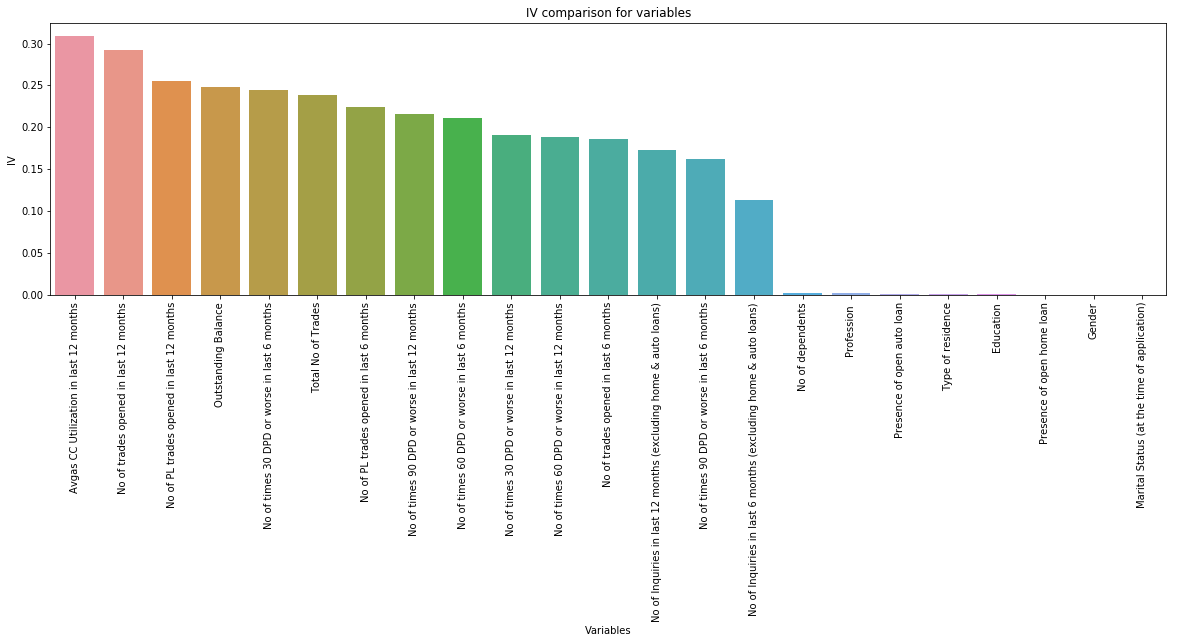

In [118]:
#Plotting consolidated IV values of the combined dataset
plt.figure(figsize = (20,5))
ax = sns.barplot(x = 'Variable',y = 'IV', data = iv.sort_values(by = 'IV', ascending = False))
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('IV comparison for variables')
plt.xlabel('Variables')
plt.ylabel('IV')
plt.show()

#### The most significant variables from the combined demographic and credit data are Avgas CC Utilization in last 12 month, No of trades opened in last 12 months, Outstanding Balance, No of PLtrades opened in last 12 months, Total No of Trades

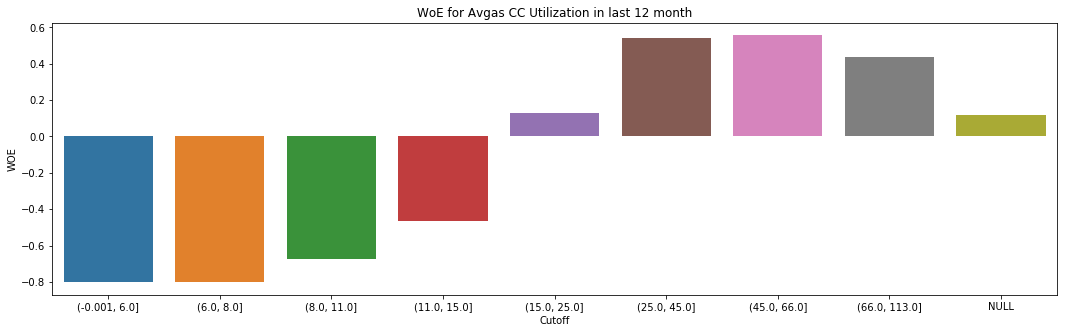

In [119]:
# Plotting the above 5 significant variables
# 1) Plotting the woe values of Avgas CC Utilization in last 12 month
plt.figure(figsize = (18,5))
sns.barplot(y = 'WoE', x = "Cutoff",data = woe[woe['Variable'] == 'Avgas CC Utilization in last 12 months'])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('WoE for Avgas CC Utilization in last 12 month')
plt.xlabel('Cutoff')
plt.ylabel('WOE')
plt.show()

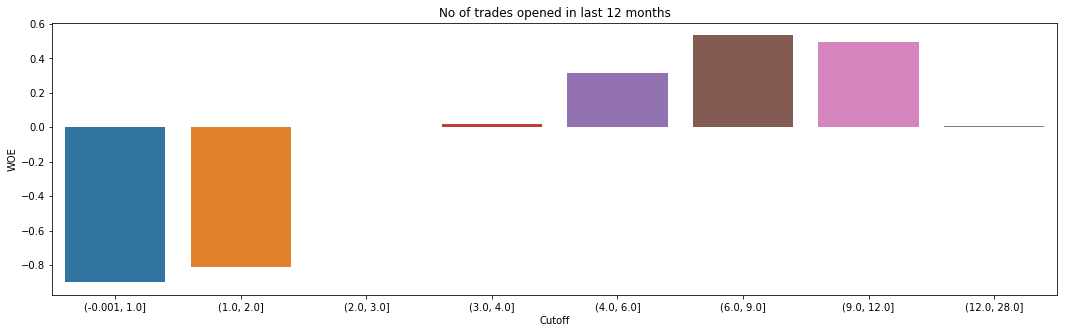

In [120]:
# 2) Plotting the woe values of No of trades opened in last 12 months
plt.figure(figsize = (18,5))
sns.barplot(y = 'WoE', x = "Cutoff",data = woe[woe['Variable'] == 'No of trades opened in last 12 months'])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('No of trades opened in last 12 months')
plt.xlabel('Cutoff')
plt.ylabel('WOE')
plt.show()

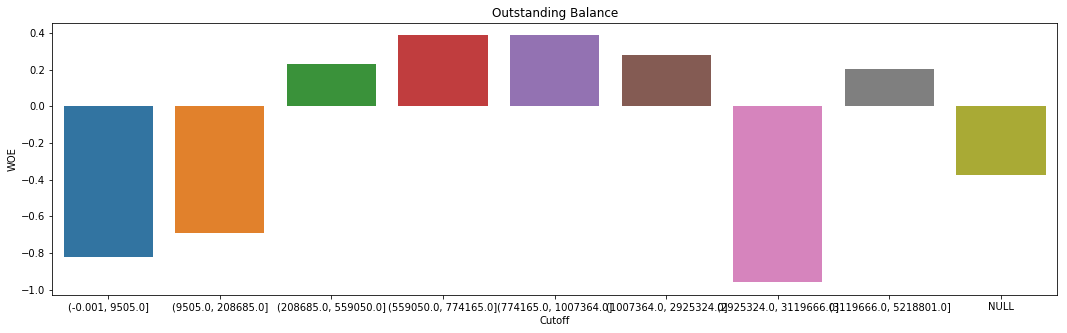

In [121]:

# 3) Plotting the woe values of Outstanding Balance
plt.figure(figsize = (18,5))
sns.barplot(y = 'WoE', x = "Cutoff",data = woe[woe['Variable'] == 'Outstanding Balance'])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40)
plt.title('Outstanding Balance')
plt.xlabel('Cutoff')
plt.ylabel('WOE')
plt.show()

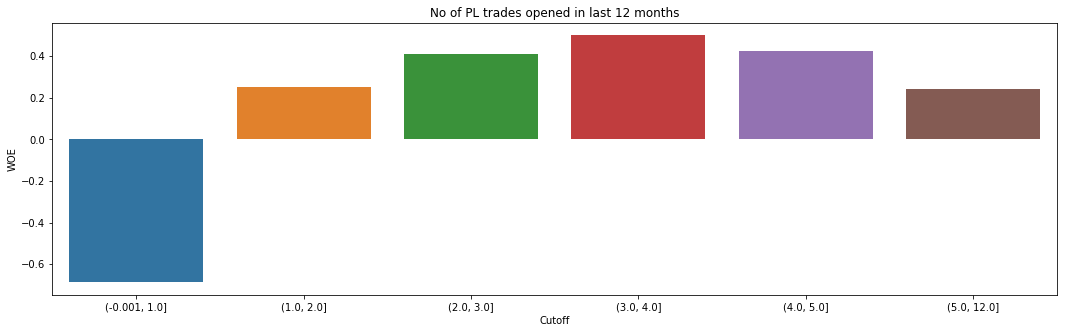

In [122]:
# 4) Plotting the woe values of No of PL trades opened in last 12 months
plt.figure(figsize = (18,5))
sns.barplot(y = 'WoE', x = "Cutoff",data = woe[woe['Variable'] == 'No of PL trades opened in last 12 months'])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('No of PL trades opened in last 12 months')
plt.xlabel('Cutoff')
plt.ylabel('WOE')
plt.show()

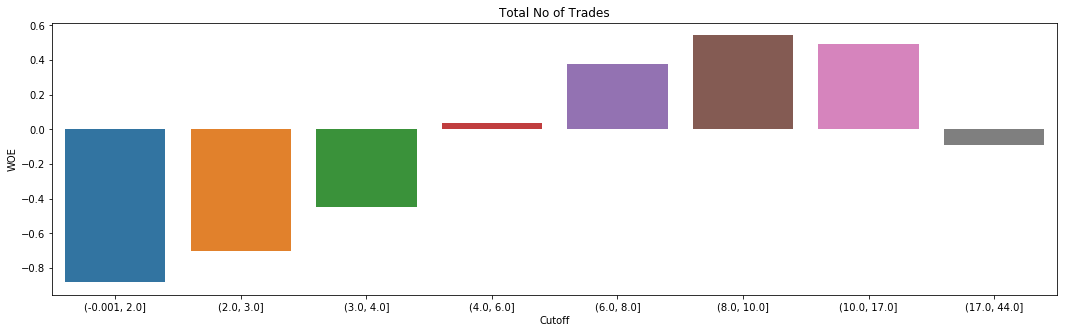

In [123]:
# 5) Plotting the woe values of Total No of Trades
plt.figure(figsize = (18,5))
sns.barplot(y = 'WoE', x = "Cutoff",data = woe[woe['Variable'] == 'Total No of Trades'])
ax.set_xticklabels(ax.get_xticklabels(), rotation = 90)
plt.title('Total No of Trades')
plt.xlabel('Cutoff')
plt.ylabel('WOE')
plt.show()

## Combine All WoE data

In [124]:
# function to create woe transformed dataframe from original dataframe
def create_woe_dataframe(master_loan,woe) :
    woe_data = pd.DataFrame(master_loan).copy()

    for cols in woe_data.columns:
        df = woe[woe.Variable==cols]
        if (woe_data[cols].dtype.kind in 'bifc') and (len(np.unique(woe_data[cols]))>8):
            for idx in df.index :
                minval = df[idx:idx+1].min_val.sum()
                maxval = df[idx:idx+1].max_val.sum()
                woe_data.loc[(woe_data[cols]>minval) & (woe_data[cols]<=maxval),cols] = df[idx:idx+1]['WoE'].sum()
        else:
            for idx in df.index :
                cutoff = list(df[idx:idx+1].Cutoff)[0]
                woe_data.loc[woe_data[cols]==cutoff,cols] = df[idx:idx+1]['WoE'].sum()

        woe_data.loc[pd.isnull(woe_data[cols]),cols] = df[df.Cutoff=='NULL']['WoE'].sum()
        woe_data[cols] = pd.to_numeric(woe_data[cols])
    
    return woe_data

In [125]:
woe_data = create_woe_dataframe(master_loan,woe)
woe_data.head()

,Gender,Marital Status (at the time of application),No of dependents,Education,Profession,Type of residence,Performance Tag,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan
0,0.032878,-0.004043,-0.083737,0.015195,-0.027824,-0.00427,0.0,-0.260863,-0.336658,-0.38717,-0.3569,-0.352299,-0.269151,-0.802809,-0.5438,-0.812506,-0.650126,-0.687654,-0.320063,-0.498584,0.001244,-0.960781,-0.445134,0.011772
1,-0.010379,-0.004043,-0.024727,-0.017194,-0.013585,-0.00427,0.0,-0.260863,-0.336658,-0.38717,-0.3569,-0.352299,-0.269151,-0.802809,-0.5438,-0.812506,-0.650126,-0.687654,-0.320063,-0.498584,0.001244,-0.822419,0.037133,0.011772
2,-0.010379,0.023076,-0.083737,0.015195,-0.013585,-0.00427,0.0,-0.260863,-0.336658,-0.38717,-0.3569,-0.352299,-0.269151,-0.798315,-0.5438,-0.899845,-0.650126,-0.687654,-0.320063,-0.498584,0.001244,-0.960781,-0.883228,0.011772
3,-0.010379,-0.004043,0.041223,0.015195,0.090164,-0.00427,0.0,-0.260863,-0.336658,-0.38717,-0.3569,-0.352299,-0.269151,-0.675808,-0.5438,-0.899845,-0.650126,-0.687654,-0.320063,-0.498584,0.001244,0.205771,-0.445134,-0.135940
4,0.032878,-0.004043,0.000560,-0.017194,-0.027824,-0.00427,0.0,-0.260863,-0.336658,-0.38717,-0.3569,-0.352299,-0.269151,-0.466984,-0.5438,-0.899845,-0.650126,-0.687654,-0.320063,-0.498584,0.001244,-0.960781,-0.445134,0.011772


## Data Modelling

In [126]:
from sklearn.model_selection import train_test_split
X = woe_data.drop(['Performance Tag'], axis = 1)

y = woe_data['Performance Tag']

In [127]:
# Spitting data into test and train
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [128]:
# Checking the percentage of performance tag across the data
Performace_percent = (sum(woe_data['Performance Tag'])/len(woe_data['Performance Tag'].index))*100
Performace_percent

4.225938419579416

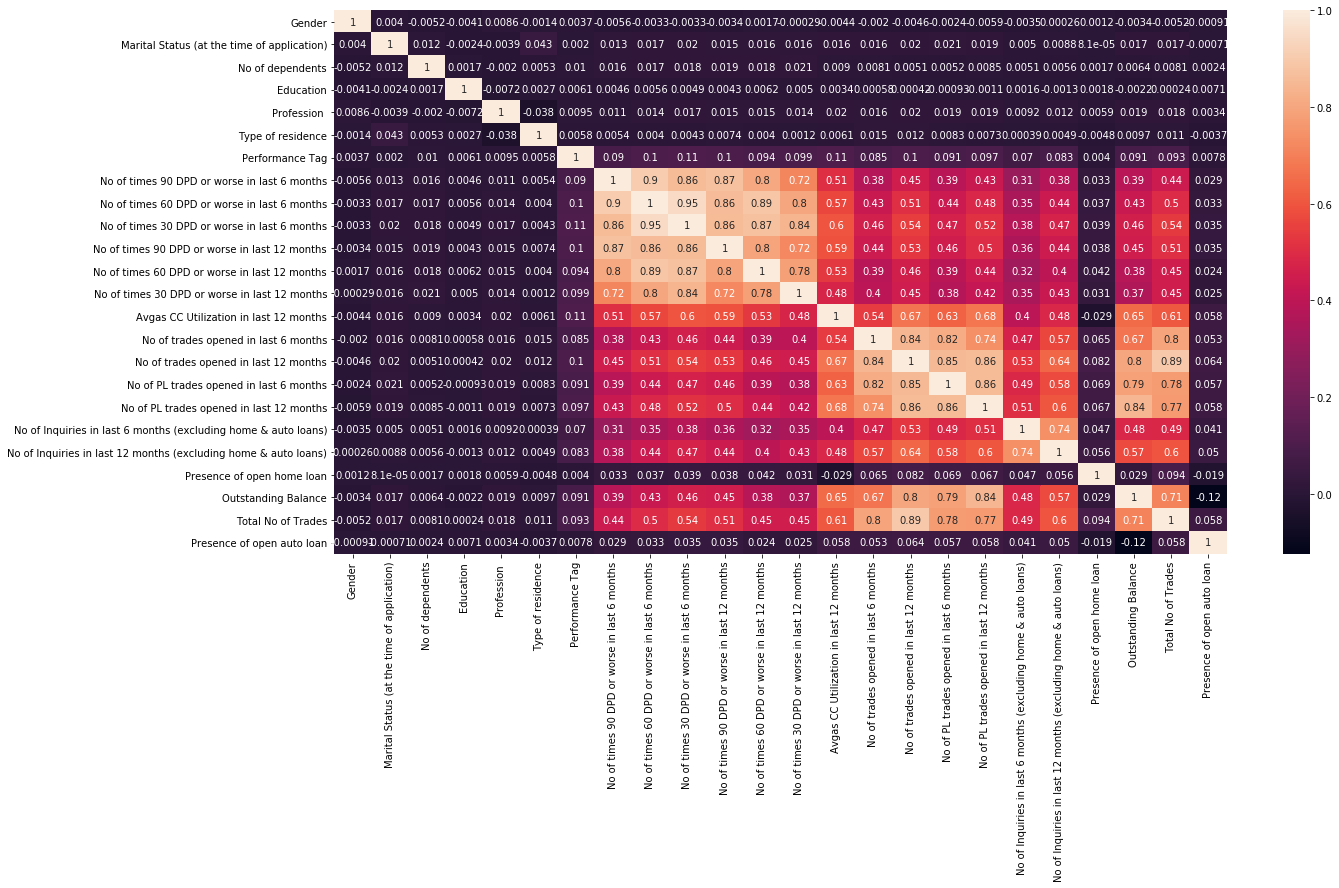

In [129]:
# From above percentage we got to know that the data is imbalance
# Finding the correlations
plt.figure(figsize = (20,10))
sns.heatmap(woe_data.corr(), annot = True)
plt.show()

## Logistic Regression

In [130]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logRegression = LogisticRegression(random_state = 100, class_weight = 'balanced')
rfe_model = RFE(logRegression, 15)
rfe_model = rfe_model.fit(X_train, y_train)

In [131]:
list(zip(X_train.columns, rfe_model.support_, rfe_model.ranking_))

[('Gender', True, 1),
 ('Marital Status (at the time of application)', True, 1),
 ('No of dependents', True, 1),
 ('Education', True, 1),
 ('Profession ', True, 1),
 ('Type of residence', True, 1),
 ('No of times 90 DPD or worse in last 6 months', True, 1),
 ('No of times 60 DPD or worse in last 6 months', True, 1),
 ('No of times 30 DPD or worse in last 6 months', True, 1),
 ('No of times 90 DPD or worse in last 12 months', False, 5),
 ('No of times 60 DPD or worse in last 12 months', True, 1),
 ('No of times 30 DPD or worse in last 12 months', True, 1),
 ('Avgas CC Utilization in last 12 months', True, 1),
 ('No of trades opened in last 6 months', False, 8),
 ('No of trades opened in last 12 months', True, 1),
 ('No of PL trades opened in last 6 months', False, 2),
 ('No of PL trades opened in last 12 months', False, 7),
 ('No of Inquiries in last 6 months (excluding home & auto loans)', False, 9),
 ('No of Inquiries in last 12 months (excluding home & auto loans)', True, 1),
 ('Pres

In [132]:
column = X_train.columns[rfe_model.support_]
column

Index(['Gender', 'Marital Status (at the time of application)',
       'No of dependents', 'Education', 'Profession ', 'Type of residence',
       'No of times 90 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 6 months',
       'No of times 30 DPD or worse in last 6 months',
       'No of times 60 DPD or worse in last 12 months',
       'No of times 30 DPD or worse in last 12 months',
       'Avgas CC Utilization in last 12 months',
       'No of trades opened in last 12 months',
       'No of Inquiries in last 12 months (excluding home & auto loans)',
       'Presence of open home loan'],
      dtype='object')

In [133]:
# Model Creation

X_train_smdl = sm.add_constant(X_train[column])
logReg15 = sm.GLM(y_train, X_train_smdl, family = sm.families.Binomial())
resm = logReg15.fit()
resm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48765
Model:                            GLM   Df Residuals:                    48749
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8278.4
Date:                Mon, 25 May 2020   Deviance:                       16557.
Time:                        18:27:14   Pearson chi2:                 4.82e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.0993      0.023   -132.322      0.000      -3.145      -3.053
Gender                                                              1.2008      1.215      0.988      0.323      -1.181       3.583
Marital Status (at the time of application)                        -1.5012      2.338     -0.642      0.521      -6.084       3.082
No of dependents                                                    0.9163      0.442      2.075      0.038       0.051       1.782
Education                                                           1.4128      0.712      1.985      0.047       0.018       2.808
Profession                                                          1.0448      0.473      2.211      0.027       0.119       1.971
Type of residence                                                   0.8857      0.757      1.171      0.242      -0.597       2.369
No of times 90 DPD or worse in last 6 months                       -0.1830      0.106     -1.723      0.085      -0.391       0.025
No of times 60 DPD or worse in last 6 months                        0.2641      0.176      1.505      0.132      -0.080       0.608
No of times 30 DPD or worse in last 6 months                        0.2079      0.149      1.396      0.163      -0.084       0.500
No of times 60 DPD or worse in last 12 months                      -0.1833      0.128     -1.434      0.151      -0.434       0.067
No of times 30 DPD or worse in last 12 months                       0.2150      0.090      2.384      0.017       0.038       0.392
Avgas CC Utilization in last 12 months                              0.4430      0.060      7.343      0.000       0.325       0.561
No of trades opened in last 12 months                               0.4401      0.067      6.608      0.000       0.310       0.571
No of Inquiries in last 12 months (excluding home & auto loans)     0.1822      0.068      2.667      0.008       0.048       0.316
Presence of open home loan                                          0.7541      1.351      0.558      0.577      -1.894       3.403
===================================================================================================================================
"""

In [134]:
# Calculating the VIF
vif = pd.DataFrame()
X = X_train_smdl
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,No of times 60 DPD or worse in last 6 months,17.03
9,No of times 30 DPD or worse in last 6 months,13.76
7,No of times 90 DPD or worse in last 6 months,5.58
10,No of times 60 DPD or worse in last 12 months,5.23
11,No of times 30 DPD or worse in last 12 months,3.58
13,No of trades opened in last 12 months,2.48
12,Avgas CC Utilization in last 12 months,2.19
14,No of Inquiries in last 12 months (excluding home & auto loans),1.77
0,const,1.09
15,Presence of open home loan,1.02


In [135]:
# Dropping the column "Presence of open home loan"
column = column.drop('Presence of open home loan',1)
X_train_smdl = sm.add_constant(X_train[column])
logReg14 = sm.GLM(y_train, X_train_smdl, family = sm.families.Binomial())
resm = logReg14.fit()
resm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48765
Model:                            GLM   Df Residuals:                    48750
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8278.5
Date:                Mon, 25 May 2020   Deviance:                       16557.
Time:                        18:27:16   Pearson chi2:                 4.82e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.0992      0.023   -132.327      0.000      -3.145      -3.053
Gender                                                              1.2035      1.215      0.990      0.322      -1.179       3.586
Marital Status (at the time of application)                        -1.5022      2.338     -0.642      0.521      -6.085       3.081
No of dependents                                                    0.9164      0.442      2.075      0.038       0.051       1.782
Education                                                           1.4134      0.712      1.985      0.047       0.018       2.809
Profession                                                          1.0460      0.473      2.214      0.027       0.120       1.972
Type of residence                                                   0.8841      0.757      1.168      0.243      -0.599       2.367
No of times 90 DPD or worse in last 6 months                       -0.1829      0.106     -1.722      0.085      -0.391       0.025
No of times 60 DPD or worse in last 6 months                        0.2634      0.176      1.501      0.133      -0.081       0.607
No of times 30 DPD or worse in last 6 months                        0.2088      0.149      1.402      0.161      -0.083       0.501
No of times 60 DPD or worse in last 12 months                      -0.1819      0.128     -1.423      0.155      -0.432       0.069
No of times 30 DPD or worse in last 12 months                       0.2142      0.090      2.375      0.018       0.037       0.391
Avgas CC Utilization in last 12 months                              0.4398      0.060      7.322      0.000       0.322       0.558
No of trades opened in last 12 months                               0.4444      0.066      6.713      0.000       0.315       0.574
No of Inquiries in last 12 months (excluding home & auto loans)     0.1827      0.068      2.674      0.008       0.049       0.317
===================================================================================================================================
"""

In [136]:
# Calculating the VIF
vif = pd.DataFrame()
X = X_train_smdl
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
8,No of times 60 DPD or worse in last 6 months,17.03
9,No of times 30 DPD or worse in last 6 months,13.76
7,No of times 90 DPD or worse in last 6 months,5.58
10,No of times 60 DPD or worse in last 12 months,5.23
11,No of times 30 DPD or worse in last 12 months,3.58
13,No of trades opened in last 12 months,2.45
12,Avgas CC Utilization in last 12 months,2.15
14,No of Inquiries in last 12 months (excluding home & auto loans),1.77
0,const,1.09
1,Gender,1.00


In [137]:
# Dropping the column "Marital Status (at the time of application)"
column = column.drop('Marital Status (at the time of application)',1)
X_train_smdl = sm.add_constant(X_train[column])
logReg13 = sm.GLM(y_train, X_train_smdl, family = sm.families.Binomial())
resm = logReg13.fit()
resm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48765
Model:                            GLM   Df Residuals:                    48751
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8278.7
Date:                Mon, 25 May 2020   Deviance:                       16557.
Time:                        18:27:19   Pearson chi2:                 4.82e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.0992      0.023   -132.331      0.000      -3.145      -3.053
Gender                                                              1.2056      1.215      0.992      0.321      -1.177       3.588
No of dependents                                                    0.9125      0.441      2.067      0.039       0.047       1.778
Education                                                           1.4150      0.712      1.987      0.047       0.019       2.811
Profession                                                          1.0468      0.473      2.215      0.027       0.121       1.973
Type of residence                                                   0.8600      0.753      1.142      0.253      -0.616       2.336
No of times 90 DPD or worse in last 6 months                       -0.1828      0.106     -1.721      0.085      -0.391       0.025
No of times 60 DPD or worse in last 6 months                        0.2634      0.176      1.501      0.133      -0.081       0.607
No of times 30 DPD or worse in last 6 months                        0.2073      0.149      1.392      0.164      -0.085       0.499
No of times 60 DPD or worse in last 12 months                      -0.1807      0.128     -1.414      0.157      -0.431       0.070
No of times 30 DPD or worse in last 12 months                       0.2142      0.090      2.375      0.018       0.037       0.391
Avgas CC Utilization in last 12 months                              0.4399      0.060      7.323      0.000       0.322       0.558
No of trades opened in last 12 months                               0.4439      0.066      6.706      0.000       0.314       0.574
No of Inquiries in last 12 months (excluding home & auto loans)     0.1829      0.068      2.677      0.007       0.049       0.317
===================================================================================================================================
"""

In [138]:
# Calculating the VIF
vif = pd.DataFrame()
X = X_train_smdl
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
7,No of times 60 DPD or worse in last 6 months,17.03
8,No of times 30 DPD or worse in last 6 months,13.76
6,No of times 90 DPD or worse in last 6 months,5.58
9,No of times 60 DPD or worse in last 12 months,5.23
10,No of times 30 DPD or worse in last 12 months,3.58
12,No of trades opened in last 12 months,2.45
11,Avgas CC Utilization in last 12 months,2.15
13,No of Inquiries in last 12 months (excluding home & auto loans),1.77
0,const,1.09
1,Gender,1.00


In [139]:
# Dropping the column "Gender"
column = column.drop('Gender',1)
X_train_smdl = sm.add_constant(X_train[column])
logReg12 = sm.GLM(y_train, X_train_smdl, family = sm.families.Binomial())
resm = logReg12.fit()
resm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48765
Model:                            GLM   Df Residuals:                    48752
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8279.2
Date:                Mon, 25 May 2020   Deviance:                       16558.
Time:                        18:27:20   Pearson chi2:                 4.82e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.0993      0.023   -132.338      0.000      -3.145      -3.053
No of dependents                                                    0.9119      0.441      2.066      0.039       0.047       1.777
Education                                                           1.4115      0.712      1.982      0.047       0.016       2.807
Profession                                                          1.0561      0.472      2.236      0.025       0.130       1.982
Type of residence                                                   0.8607      0.753      1.143      0.253      -0.615       2.337
No of times 90 DPD or worse in last 6 months                       -0.1838      0.106     -1.730      0.084      -0.392       0.024
No of times 60 DPD or worse in last 6 months                        0.2641      0.176      1.504      0.132      -0.080       0.608
No of times 30 DPD or worse in last 6 months                        0.2068      0.149      1.389      0.165      -0.085       0.499
No of times 60 DPD or worse in last 12 months                      -0.1808      0.128     -1.415      0.157      -0.431       0.070
No of times 30 DPD or worse in last 12 months                       0.2147      0.090      2.381      0.017       0.038       0.391
Avgas CC Utilization in last 12 months                              0.4396      0.060      7.318      0.000       0.322       0.557
No of trades opened in last 12 months                               0.4437      0.066      6.703      0.000       0.314       0.573
No of Inquiries in last 12 months (excluding home & auto loans)     0.1834      0.068      2.684      0.007       0.049       0.317
===================================================================================================================================
"""

In [140]:
# Calculating the VIF
vif = pd.DataFrame()
X = X_train_smdl
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,No of times 60 DPD or worse in last 6 months,17.03
7,No of times 30 DPD or worse in last 6 months,13.76
5,No of times 90 DPD or worse in last 6 months,5.58
8,No of times 60 DPD or worse in last 12 months,5.23
9,No of times 30 DPD or worse in last 12 months,3.58
11,No of trades opened in last 12 months,2.45
10,Avgas CC Utilization in last 12 months,2.15
12,No of Inquiries in last 12 months (excluding home & auto loans),1.77
0,const,1.08
1,No of dependents,1.00


In [141]:
# Dropping the column "Type of residence"
column = column.drop('Type of residence',1)
X_train_smdl = sm.add_constant(X_train[column])
logReg11 = sm.GLM(y_train, X_train_smdl, family = sm.families.Binomial())
resm = logReg11.fit()
resm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48765
Model:                            GLM   Df Residuals:                    48753
Model Family:                Binomial   Df Model:                           11
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8279.9
Date:                Mon, 25 May 2020   Deviance:                       16560.
Time:                        18:27:22   Pearson chi2:                 4.82e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.0994      0.023   -132.350      0.000      -3.145      -3.053
No of dependents                                                    0.9164      0.442      2.075      0.038       0.051       1.782
Education                                                           1.4187      0.712      1.992      0.046       0.023       2.815
Profession                                                          1.0286      0.472      2.180      0.029       0.104       1.953
No of times 90 DPD or worse in last 6 months                       -0.1830      0.106     -1.723      0.085      -0.391       0.025
No of times 60 DPD or worse in last 6 months                        0.2637      0.176      1.502      0.133      -0.080       0.608
No of times 30 DPD or worse in last 6 months                        0.2061      0.149      1.384      0.166      -0.086       0.498
No of times 60 DPD or worse in last 12 months                      -0.1801      0.128     -1.410      0.159      -0.430       0.070
No of times 30 DPD or worse in last 12 months                       0.2146      0.090      2.380      0.017       0.038       0.391
Avgas CC Utilization in last 12 months                              0.4393      0.060      7.313      0.000       0.322       0.557
No of trades opened in last 12 months                               0.4447      0.066      6.719      0.000       0.315       0.574
No of Inquiries in last 12 months (excluding home & auto loans)     0.1828      0.068      2.676      0.007       0.049       0.317
===================================================================================================================================
"""

In [142]:
# Calculating the VIF
vif = pd.DataFrame()
X = X_train_smdl
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,No of times 60 DPD or worse in last 6 months,17.03
6,No of times 30 DPD or worse in last 6 months,13.76
4,No of times 90 DPD or worse in last 6 months,5.58
7,No of times 60 DPD or worse in last 12 months,5.23
8,No of times 30 DPD or worse in last 12 months,3.58
10,No of trades opened in last 12 months,2.45
9,Avgas CC Utilization in last 12 months,2.15
11,No of Inquiries in last 12 months (excluding home & auto loans),1.77
0,const,1.08
1,No of dependents,1.00


In [143]:
# Dropping the column "No of times 30 DPD or worse in last 6 months"
column = column.drop('No of times 30 DPD or worse in last 6 months',1)
X_train_smdl = sm.add_constant(X_train[column])
logReg10 = sm.GLM(y_train, X_train_smdl, family = sm.families.Binomial())
resm = logReg10.fit()
resm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48765
Model:                            GLM   Df Residuals:                    48754
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8280.9
Date:                Mon, 25 May 2020   Deviance:                       16562.
Time:                        18:27:23   Pearson chi2:                 4.82e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.0997      0.023   -132.362      0.000      -3.146      -3.054
No of dependents                                                    0.9183      0.442      2.080      0.038       0.053       1.784
Education                                                           1.4175      0.712      1.991      0.047       0.022       2.813
Profession                                                          1.0370      0.472      2.198      0.028       0.112       1.962
No of times 90 DPD or worse in last 6 months                       -0.1823      0.106     -1.715      0.086      -0.391       0.026
No of times 60 DPD or worse in last 6 months                        0.4057      0.144      2.810      0.005       0.123       0.689
No of times 60 DPD or worse in last 12 months                      -0.1643      0.127     -1.289      0.197      -0.414       0.085
No of times 30 DPD or worse in last 12 months                       0.2640      0.083      3.163      0.002       0.100       0.428
Avgas CC Utilization in last 12 months                              0.4517      0.059      7.612      0.000       0.335       0.568
No of trades opened in last 12 months                               0.4519      0.066      6.848      0.000       0.323       0.581
No of Inquiries in last 12 months (excluding home & auto loans)     0.1873      0.068      2.745      0.006       0.054       0.321
===================================================================================================================================
"""

In [144]:
# Calculating the VIF
vif = pd.DataFrame()
X = X_train_smdl
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,No of times 60 DPD or worse in last 6 months,10.59
4,No of times 90 DPD or worse in last 6 months,5.58
6,No of times 60 DPD or worse in last 12 months,5.18
7,No of times 30 DPD or worse in last 12 months,3.05
9,No of trades opened in last 12 months,2.44
8,Avgas CC Utilization in last 12 months,2.11
10,No of Inquiries in last 12 months (excluding home & auto loans),1.77
0,const,1.08
1,No of dependents,1.00
2,Education,1.00


In [145]:

# Dropping the column "No of times 60 DPD or worse in last 12 months"
column = column.drop('No of times 60 DPD or worse in last 12 months',1)
X_train_smdl = sm.add_constant(X_train[column])
logReg9 = sm.GLM(y_train, X_train_smdl, family = sm.families.Binomial())
resm = logReg9.fit()
resm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48765
Model:                            GLM   Df Residuals:                    48755
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8281.7
Date:                Mon, 25 May 2020   Deviance:                       16563.
Time:                        18:27:24   Pearson chi2:                 4.83e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.0991      0.023   -132.421      0.000      -3.145      -3.053
No of dependents                                                    0.9145      0.442      2.071      0.038       0.049       1.780
Education                                                           1.4201      0.713      1.992      0.046       0.023       2.817
Profession                                                          1.0331      0.472      2.190      0.029       0.108       1.958
No of times 90 DPD or worse in last 6 months                       -0.1859      0.106     -1.748      0.081      -0.394       0.023
No of times 60 DPD or worse in last 6 months                        0.2963      0.117      2.541      0.011       0.068       0.525
No of times 30 DPD or worse in last 12 months                       0.2322      0.080      2.911      0.004       0.076       0.388
Avgas CC Utilization in last 12 months                              0.4452      0.059      7.525      0.000       0.329       0.561
No of trades opened in last 12 months                               0.4538      0.066      6.874      0.000       0.324       0.583
No of Inquiries in last 12 months (excluding home & auto loans)     0.1843      0.068      2.701      0.007       0.051       0.318
===================================================================================================================================
"""

In [146]:
# Calculating the VIF
vif = pd.DataFrame()
X = X_train_smdl
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,No of times 60 DPD or worse in last 6 months,8.01
4,No of times 90 DPD or worse in last 6 months,5.58
6,No of times 30 DPD or worse in last 12 months,2.84
8,No of trades opened in last 12 months,2.43
7,Avgas CC Utilization in last 12 months,2.09
9,No of Inquiries in last 12 months (excluding home & auto loans),1.77
0,const,1.08
1,No of dependents,1.00
2,Education,1.00
3,Profession,1.00


In [147]:

# Dropping the column "No of times 90 DPD or worse in last 6 months"
column = column.drop('No of times 90 DPD or worse in last 6 months',1)
X_train_smdl = sm.add_constant(X_train[column])
logReg8 = sm.GLM(y_train, X_train_smdl, family = sm.families.Binomial())
resm = logReg8.fit()
resm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48765
Model:                            GLM   Df Residuals:                    48756
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8283.2
Date:                Mon, 25 May 2020   Deviance:                       16566.
Time:                        18:27:24   Pearson chi2:                 4.83e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.0990      0.023   -132.430      0.000      -3.145      -3.053
No of dependents                                                    0.9130      0.441      2.068      0.039       0.048       1.778
Education                                                           1.4217      0.712      1.996      0.046       0.026       2.818
Profession                                                          1.0343      0.472      2.193      0.028       0.110       1.959
No of times 60 DPD or worse in last 6 months                        0.1486      0.081      1.831      0.067      -0.010       0.308
No of times 30 DPD or worse in last 12 months                       0.2336      0.080      2.927      0.003       0.077       0.390
Avgas CC Utilization in last 12 months                              0.4453      0.059      7.530      0.000       0.329       0.561
No of trades opened in last 12 months                               0.4545      0.066      6.885      0.000       0.325       0.584
No of Inquiries in last 12 months (excluding home & auto loans)     0.1884      0.068      2.764      0.006       0.055       0.322
===================================================================================================================================
"""

In [148]:
# Calculating the VIF
vif = pd.DataFrame()
X = X_train_smdl
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,No of times 60 DPD or worse in last 6 months,3.19
5,No of times 30 DPD or worse in last 12 months,2.84
7,No of trades opened in last 12 months,2.43
6,Avgas CC Utilization in last 12 months,2.09
8,No of Inquiries in last 12 months (excluding home & auto loans),1.77
0,const,1.08
1,No of dependents,1.00
2,Education,1.00
3,Profession,1.00


In [149]:

# Dropping the column "No of times 60 DPD or worse in last 6 months"
column = column.drop('No of times 60 DPD or worse in last 6 months',1)
X_train_smdl = sm.add_constant(X_train[column])
logReg7 = sm.GLM(y_train, X_train_smdl, family = sm.families.Binomial())
resm = logReg7.fit()
resm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:        Performance Tag   No. Observations:                48765
Model:                            GLM   Df Residuals:                    48757
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -8284.9
Date:                Mon, 25 May 2020   Deviance:                       16570.
Time:                        18:27:25   Pearson chi2:                 4.83e+04
No. Iterations:                     7   Covariance Type:             nonrobust
===================================================================================================================================
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------
const                                                              -3.0988      0.023   -132.445      0.000      -3.145      -3.053
No of dependents                                                    0.9085      0.441      2.058      0.040       0.043       1.774
Education                                                           1.4283      0.712      2.005      0.045       0.032       2.824
Profession                                                          1.0291      0.472      2.182      0.029       0.105       1.954
No of times 30 DPD or worse in last 12 months                       0.3390      0.056      6.061      0.000       0.229       0.449
Avgas CC Utilization in last 12 months                              0.4684      0.058      8.109      0.000       0.355       0.582
No of trades opened in last 12 months                               0.4641      0.066      7.050      0.000       0.335       0.593
No of Inquiries in last 12 months (excluding home & auto loans)     0.1897      0.068      2.781      0.005       0.056       0.323
===================================================================================================================================
"""

In [150]:
# Calculating the VIF
vif = pd.DataFrame()
X = X_train_smdl
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
6,No of trades opened in last 12 months,2.41
5,Avgas CC Utilization in last 12 months,1.97
7,No of Inquiries in last 12 months (excluding home & auto loans),1.77
4,No of times 30 DPD or worse in last 12 months,1.39
0,const,1.08
1,No of dependents,1.00
2,Education,1.00
3,Profession,1.00


## Random Forest Model

In [161]:
from sklearn.ensemble import RandomForestClassifier

rfc_model = RandomForestClassifier(class_weight = 'balanced')
rfc_model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [162]:
#Predictions 
predictions = rfc_model.predict(X_test)


In [163]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98     20054
         1.0       0.03      0.00      0.01       846

    accuracy                           0.95     20900
   macro avg       0.49      0.50      0.49     20900
weighted avg       0.92      0.95      0.94     20900



In [164]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predictions))

#Calculate Accuracy
print("Accuracy : ", metrics.accuracy_score(y_test, predictions))

#Calculate Precision
print("Precision : ", metrics.precision_score(y_test,predictions))

#Calculate Recall/Sensitivity
print("Recall/Sensitivity : ", metrics.recall_score(y_test, predictions))


[[19926   128]
 [  842     4]]
Accuracy :  0.9535885167464114
Precision :  0.030303030303030304
Recall/Sensitivity :  0.004728132387706856


In [165]:
from sklearn.model_selection import GridSearchCV
# Specifying no of folds
n_fold = 5
parameter = {'max_depth' : range(2,20,4)}

#instantiating the model
rf_m = RandomForestClassifier(class_weight = 'balanced')

#Fitting Tree
rf_m = GridSearchCV(rf_m, parameter, cv = n_fold, scoring = "recall", return_train_score = True, verbose = 1)
rf_m.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:  1.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [166]:
#CV Scores
cv_scores = rf_m.cv_results_
pd.DataFrame(cv_scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.355679,0.105500,0.101447,0.017739,2,{'max_depth': 2},0.718377,0.780430,0.714286,0.666667,0.723810,0.720714,0.036176,1,0.727219,0.711733,0.737187,0.733015,0.716925,0.725216,0.009578
1,2.048086,0.116546,0.155728,0.057957,6,{'max_depth': 6},0.656325,0.699284,0.657143,0.604762,0.659524,0.655407,0.030036,2,0.706373,0.703395,0.718713,0.725268,0.711561,0.713062,0.008017
2,2.732850,0.058531,0.170768,0.021637,10,{'max_depth': 10},0.365155,0.357995,0.364286,0.321429,0.404762,0.362725,0.026470,3,0.746873,0.731983,0.746722,0.750298,0.724076,0.739991,0.010162
3,3.346061,0.094354,0.241853,0.048320,14,{'max_depth': 14},0.038186,0.035800,0.033333,0.030952,0.045238,0.036702,0.004905,4,0.830852,0.815366,0.840286,0.848629,0.831347,0.833296,0.011093
4,4.477291,0.433199,0.275154,0.037102,18,{'max_depth': 18},0.004773,0.000000,0.002381,0.004762,0.002381,0.002859,0.001784,5,0.927338,0.924360,0.923719,0.933254,0.915375,0.924809,0.005798


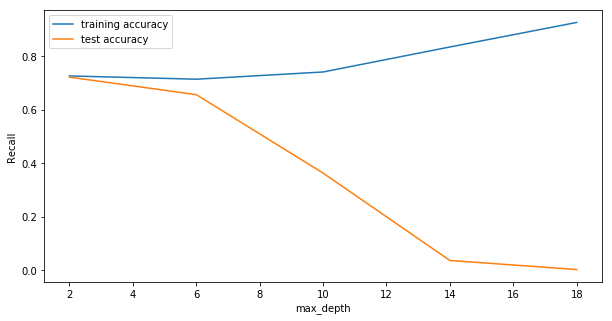

In [167]:
plt.figure(figsize = (10,5))
plt.plot(cv_scores["param_max_depth"], cv_scores["mean_train_score"], label = "training accuracy")
plt.plot(cv_scores["param_max_depth"], cv_scores["mean_test_score"], label = "test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Recall")
plt.legend()
plt.show()

In [168]:
# Tuning n_estimators

# Specifying no of folds
n_fold = 5
parameter = {'n_estimators' : range(100,1500,400)}

#instantiating the model
rf_m = RandomForestClassifier(class_weight = 'balanced')

#Fitting Tree
rf_m = GridSearchCV(rf_m, parameter, cv = n_fold, scoring = "recall", return_train_score = True, verbose = 1)
rf_m.fit(X_train,y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed: 13.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [169]:
#CV Scores
cv_scores = rf_m.cv_results_
pd.DataFrame(cv_scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.595171,0.155220,0.304912,0.041112,100,{'n_estimators': 100},0.004773,0.0,0.007143,0.007143,0.004762,0.004764,0.002608,2,0.996426,0.996426,0.993445,0.997020,0.995828,0.995829,0.001250
1,22.491967,0.664002,1.517901,0.182977,500,{'n_estimators': 500},0.007160,0.0,0.007143,0.007143,0.004762,0.005242,0.002779,1,0.998809,0.998213,0.998212,0.998808,0.996424,0.998093,0.000876
2,38.145949,2.676214,2.683020,0.092614,900,{'n_estimators': 900},0.004773,0.0,0.007143,0.007143,0.004762,0.004764,0.002608,2,0.997618,0.998213,0.998212,0.998808,0.996424,0.997855,0.000808
3,55.346183,1.162689,4.007610,0.093029,1300,{'n_estimators': 1300},0.004773,0.0,0.004762,0.007143,0.004762,0.004288,0.002333,4,0.996426,0.998213,0.998212,0.998212,0.997020,0.997617,0.000753


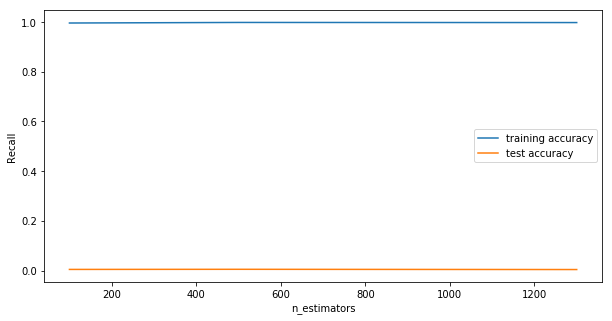

In [170]:
plt.figure(figsize = (10,5))
plt.plot(cv_scores["param_n_estimators"], cv_scores["mean_train_score"], label = "training accuracy")
plt.plot(cv_scores["param_n_estimators"], cv_scores["mean_test_score"], label = "test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Recall")
plt.legend()
plt.show()

In [171]:
# Tuning max_features
# Specifying no of folds
n_fold = 5
parameter = {'max_features' : [4,8,14,20,24,27]}

#instantiating the model
rf_m = RandomForestClassifier(class_weight = 'balanced')

#Fitting Tree
rf_m = GridSearchCV(rf_m, parameter, cv = n_fold, scoring = "recall", return_train_score = True, verbose = 1)
rf_m.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  3.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [172]:
#CV Scores
cv_scores = rf_m.cv_results_
pd.DataFrame(cv_scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.239681,0.217194,0.285346,0.028881,4,{'max_features': 4},0.004773,0.0,0.004762,0.007143,0.002381,0.003812,0.002429,4,0.995235,0.997022,0.997020,0.994636,0.991657,0.995114,0.001973
1,6.044885,0.185671,0.251575,0.025589,8,{'max_features': 8},0.002387,0.0,0.007143,0.007143,0.004762,0.004287,0.002776,3,0.994044,0.997022,0.996424,0.994636,0.992253,0.994876,0.001711
2,9.159243,0.497024,0.290681,0.064295,14,{'max_features': 14},0.002387,0.0,0.007143,0.009524,0.004762,0.004763,0.003366,2,0.997022,0.994640,0.996424,0.997020,0.993445,0.995710,0.001430
3,13.222634,0.786798,0.236754,0.010081,20,{'max_features': 20},0.004773,0.0,0.007143,0.007143,0.004762,0.004764,0.002608,1,0.991662,0.996426,0.996424,0.997020,0.993445,0.994995,0.002084
4,0.080983,0.007432,0.000000,0.000000,24,{'max_features': 24},NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN


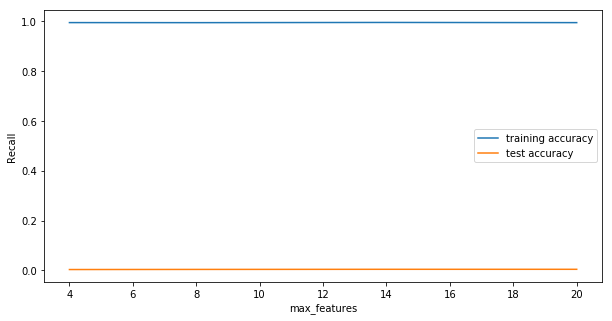

In [173]:
plt.figure(figsize = (10,5))
plt.plot(cv_scores["param_max_features"], cv_scores["mean_train_score"], label = "training accuracy")
plt.plot(cv_scores["param_max_features"], cv_scores["mean_test_score"], label = "test accuracy")
plt.xlabel("max_features")
plt.ylabel("Recall")
plt.legend()
plt.show()

In [174]:
# Min_Sample_Leaf
# Specifying no of folds
n_fold = 5
parameter = {'min_samples_leaf' : range(100,400,50)}

#instantiating the model
rf_m = RandomForestClassifier(class_weight = 'balanced')

#Fitting Tree
rf_m = GridSearchCV(rf_m, parameter, cv = n_fold, scoring = "recall", return_train_score = True, verbose = 1)
rf_m.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.5min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [175]:
#CV Scores
cv_scores = rf_m.cv_results_
pd.DataFrame(cv_scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.840540,0.341187,0.189412,0.068626,100,{'min_samples_leaf': 100},0.587112,0.639618,0.630952,0.530952,0.611905,0.600108,0.038995,6,0.707564,0.693270,0.710965,0.719905,0.702026,0.706746,0.008894
1,2.466889,0.339937,0.156445,0.012347,150,{'min_samples_leaf': 150},0.622912,0.673031,0.642857,0.564286,0.630952,0.626808,0.035596,5,0.702799,0.690292,0.704410,0.719309,0.706198,0.704602,0.009240
2,2.288072,0.279389,0.150812,0.018812,200,{'min_samples_leaf': 200},0.651551,0.708831,0.659524,0.583333,0.657143,0.652076,0.040070,4,0.704586,0.699226,0.704410,0.713349,0.702622,0.704839,0.004671
3,2.202760,0.135041,0.133022,0.005158,250,{'min_samples_leaf': 250},0.651551,0.715990,0.659524,0.592857,0.659524,0.655889,0.039065,3,0.698035,0.693270,0.707390,0.709178,0.696067,0.700788,0.006330
4,2.073777,0.177263,0.125813,0.003741,300,{'min_samples_leaf': 300},0.668258,0.715990,0.664286,0.604762,0.664286,0.663516,0.035297,2,0.702204,0.689101,0.709774,0.716925,0.698451,0.703291,0.009528


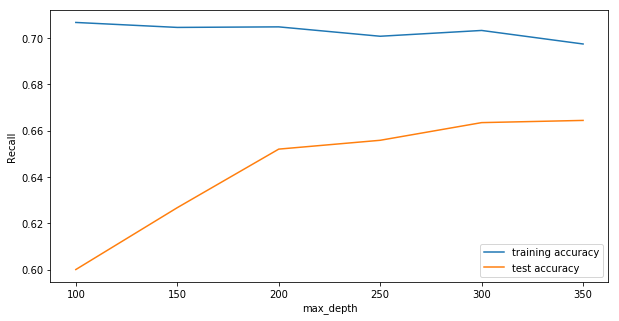

In [176]:
plt.figure(figsize = (10,5))
plt.plot(cv_scores["param_min_samples_leaf"], cv_scores["mean_train_score"], label = "training accuracy")
plt.plot(cv_scores["param_min_samples_leaf"], cv_scores["mean_test_score"], label = "test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Recall")
plt.legend()
plt.show()

In [177]:
# Specifying no of folds
n_fold = 5
parameter = {'min_samples_split' : range(200,500,50)}

#instantiating the model
rf_m = RandomForestClassifier(class_weight = 'balanced')

#Fitting Tree
rf_m = GridSearchCV(rf_m, parameter, cv = n_fold, scoring = "recall", return_train_score = True, verbose = 1)
rf_m.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  1.8min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                             

In [178]:

#CV Scores
cv_scores = rf_m.cv_results_
pd.DataFrame(cv_scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.278741,0.407544,0.190557,0.038893,200,{'min_samples_split': 200},0.491647,0.491647,0.492857,0.450000,0.530952,0.491421,0.025615,6,0.719476,0.721263,0.729440,0.732420,0.724076,0.725335,0.004890
1,2.885982,0.120778,0.164461,0.005681,250,{'min_samples_split': 250},0.515513,0.544153,0.540476,0.488095,0.554762,0.528600,0.023997,5,0.712329,0.696843,0.721097,0.733611,0.712157,0.715207,0.012068
2,2.644974,0.149760,0.178323,0.024610,300,{'min_samples_split': 300},0.553699,0.587112,0.576190,0.497619,0.571429,0.557210,0.031686,4,0.724836,0.710542,0.732420,0.730036,0.710965,0.721760,0.009316
3,2.737355,0.157737,0.200024,0.057840,350,{'min_samples_split': 350},0.546539,0.613365,0.607143,0.500000,0.595238,0.572457,0.043168,3,0.715902,0.699821,0.723480,0.719905,0.712753,0.714372,0.008127
4,2.630935,0.151427,0.168094,0.019213,400,{'min_samples_split': 400},0.589499,0.634845,0.626190,0.514286,0.597619,0.592488,0.042616,2,0.718880,0.702799,0.713945,0.722288,0.713945,0.714372,0.006592


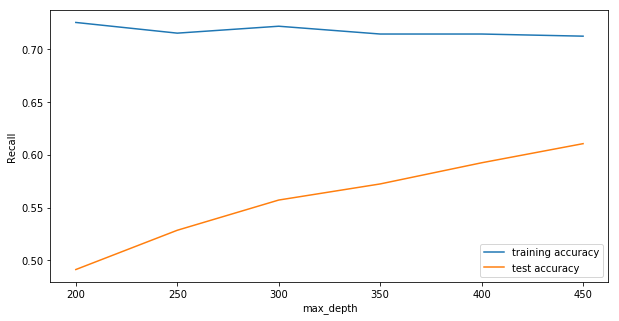

In [179]:
plt.figure(figsize = (10,5))
plt.plot(cv_scores["param_min_samples_split"], cv_scores["mean_train_score"], label = "training accuracy")
plt.plot(cv_scores["param_min_samples_split"], cv_scores["mean_test_score"], label = "test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Recall")
plt.legend()
plt.show()

In [180]:
# Printing the score and hyperparameter
print("Recall : ", rf_m.best_score_, "Hyperparameters :", rf_m.best_params_)

Recall :  0.6105909762473007 Hyperparameters : {'min_samples_split': 450}


In [181]:
from sklearn.ensemble import RandomForestClassifier
rfc_m = RandomForestClassifier(bootstrap = True, max_depth = 4, min_samples_leaf = 350, min_samples_split = 400,max_features = 10, 
                               n_estimators = 900, class_weight = 'balanced')

In [182]:
#Fitting the model
rfc_m.fit(X_train,y_train)

#Predict
prediction =rfc_m.predict(X_test)
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98     20054
         1.0       0.03      0.00      0.01       846

    accuracy                           0.95     20900
   macro avg       0.49      0.50      0.49     20900
weighted avg       0.92      0.95      0.94     20900



In [183]:
print(metrics.confusion_matrix(y_test, prediction))
print("Accuracy : ", metrics.accuracy_score(y_test,prediction))
print("Precision : ", metrics.precision_score(y_test, prediction))
print("Recall : ", metrics.recall_score(y_test,prediction))

[[10970  9084]
 [  220   626]]
Accuracy :  0.5548325358851675
Precision :  0.06446961894953657
Recall :  0.7399527186761229


## ScoreCard

In [184]:
scorecard_model = LogisticRegression(C = 0.01, penalty = "l2", class_weight = 'balanced')
scorecard_model.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [185]:
scorecard_model.coef_[0]

array([ 0.03636122, -0.00560917,  0.21045933,  0.11487657,  0.19557064,
        0.09962372, -0.14286208,  0.17855343,  0.18290199,  0.06140718,
       -0.15041721,  0.22337917,  0.41360634,  0.06254027,  0.2648821 ,
        0.1047127 ,  0.07474115, -0.00678206,  0.15864426,  0.03367067,
        0.09616249, -0.03027808,  0.01911959])

In [186]:
intercept_score = scorecard_model.intercept_[0]
intercept_score

0.002032089536570604

In [187]:
woe_params = pd.DataFrame({'cols' : X_train.columns, 'coeff' : scorecard_model.coef_[0]})
woe_params_index = woe_params.set_index('cols')
woe_params_index

,coeff
cols,
Gender,0.036361
Marital Status (at the time of application),-0.005609
No of dependents,0.210459
Education,0.114877
Profession,0.195571
Type of residence,0.099624
No of times 90 DPD or worse in last 6 months,-0.142862
No of times 60 DPD or worse in last 6 months,0.178553
No of times 30 DPD or worse in last 6 months,0.182902


In [188]:
# Removing params having zero coeff
woe_params_index = woe_params_index[woe_params_index['coeff'] !=0]
woe_params_index

,coeff
cols,
Gender,0.036361
Marital Status (at the time of application),-0.005609
No of dependents,0.210459
Education,0.114877
Profession,0.195571
Type of residence,0.099624
No of times 90 DPD or worse in last 6 months,-0.142862
No of times 60 DPD or worse in last 6 months,0.178553
No of times 30 DPD or worse in last 6 months,0.182902


In [189]:
scoreCard = woe_data[woe_params_index.index].apply(lambda x : x * woe_params_index['coeff'], axis = 1)
scoreCard.head()

,Gender,Marital Status (at the time of application),No of dependents,Education,Profession,Type of residence,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan
0,0.001196,0.000023,-0.017623,0.001746,-0.005442,-0.000425,0.037267,-0.060112,-0.070814,-0.021916,0.052992,-0.060123,-0.332047,-0.034009,-0.215218,-0.068076,-0.051396,0.002171,-0.079097,0.000042,-0.092391,0.013478,0.000225
1,-0.000377,0.000023,-0.005204,-0.001975,-0.002657,-0.000425,0.037267,-0.060112,-0.070814,-0.021916,0.052992,-0.060123,-0.332047,-0.034009,-0.215218,-0.068076,-0.051396,0.002171,-0.079097,0.000042,-0.079086,-0.001124,0.000225
2,-0.000377,-0.000129,-0.017623,0.001746,-0.002657,-0.000425,0.037267,-0.060112,-0.070814,-0.021916,0.052992,-0.060123,-0.330188,-0.034009,-0.238353,-0.068076,-0.051396,0.002171,-0.079097,0.000042,-0.092391,0.026742,0.000225
3,-0.000377,0.000023,0.008676,0.001746,0.017633,-0.000425,0.037267,-0.060112,-0.070814,-0.021916,0.052992,-0.060123,-0.279519,-0.034009,-0.238353,-0.068076,-0.051396,0.002171,-0.079097,0.000042,0.019787,0.013478,-0.002599
4,0.001196,0.000023,0.000118,-0.001975,-0.005442,-0.000425,0.037267,-0.060112,-0.070814,-0.021916,0.052992,-0.060123,-0.193147,-0.034009,-0.238353,-0.068076,-0.051396,0.002171,-0.079097,0.000042,-0.092391,0.013478,0.000225


In [190]:
scoreCard['log']= scoreCard.sum(axis =1) + intercept_score

In [191]:
scoreCard['odds'] = np.exp(-scoreCard['log'])
scoreCard['probability'] = scoreCard['odds']/ (scoreCard['odds']+1)

In [192]:
scoreCard['Scores'] = 400+20 * np.log10(scoreCard['odds'])/np.log10(2)

In [193]:
scoreCard

,Gender,Marital Status (at the time of application),No of dependents,Education,Profession,Type of residence,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,log,odds,probability,Scores
0,0.001196,0.000023,-0.017623,0.001746,-0.005442,-0.000425,0.037267,-0.060112,-0.070814,-0.021916,0.052992,-0.060123,-0.332047,-0.034009,-0.215218,-0.068076,-0.051396,0.002171,-0.079097,0.000042,-0.092391,0.013478,0.000225,-0.997520,2.711549,0.730571,428.782342
1,-0.000377,0.000023,-0.005204,-0.001975,-0.002657,-0.000425,0.037267,-0.060112,-0.070814,-0.021916,0.052992,-0.060123,-0.332047,-0.034009,-0.215218,-0.068076,-0.051396,0.002171,-0.079097,0.000042,-0.079086,-0.001124,0.000225,-0.988907,2.688294,0.728872,428.533816
2,-0.000377,-0.000129,-0.017623,0.001746,-0.002657,-0.000425,0.037267,-0.060112,-0.070814,-0.021916,0.052992,-0.060123,-0.330188,-0.034009,-0.238353,-0.068076,-0.051396,0.002171,-0.079097,0.000042,-0.092391,0.026742,0.000225,-1.004471,2.730463,0.731937,428.982913
3,-0.000377,0.000023,0.008676,0.001746,0.017633,-0.000425,0.037267,-0.060112,-0.070814,-0.021916,0.052992,-0.060123,-0.279519,-0.034009,-0.238353,-0.068076,-0.051396,0.002171,-0.079097,0.000042,0.019787,0.013478,-0.002599,-0.810970,2.250091,0.692316,423.399661
4,0.001196,0.000023,0.000118,-0.001975,-0.005442,-0.000425,0.037267,-0.060112,-0.070814,-0.021916,0.052992,-0.060123,-0.193147,-0.034009,-0.238353,-0.068076,-0.051396,0.002171,-0.079097,0.000042,-0.092391,0.013478,0.000225,-0.867735,2.381510,0.704274,425.037526
5,-0.000377,0.000023,-0.017623,-0.001975,-0.005442,-0.000425,0.037267,-0.060112,-0.070814,-0.021916,0.052992,-0.060123,-0.279519,-0.034009,-0.238353,-0.068076,-0.051396,0.002171,-0.079097,0.000042,-0.092391,0.013478,0.000225,-0.973419,2.646980,0.725801,428.086949
6,-0.000377,0.000023,-0.017623,0.000980,-0.002657,-0.000425,0.037267,-0.060112,-0.070814,-0.021916,0.052992,-0.060123,-0.193147,-0.034009,-0.238353,-0.068076,-0.051396,0.002171,-0.079097,0.000042,-0.092391,0.021322,0.000225,-0.873465,2.395195,0.705466,425.202866
7,-0.000377,0.000023,0.011373,-0.003293,-0.005442,-0.000425,0.037267,-0.060112,-0.070814,-0.021916,0.052992,-0.060123,-0.279519,-0.034009,-0.238353,-0.068076,-0.051396,0.002171,-0.079097,0.000042,-0.092391,0.026742,0.000225,-0.932476,2.540793,0.717577,426.905578
8,-0.000377,-0.000129,0.008676,0.001746,-0.002657,-0.000425,0.037267,-0.060112,-0.070814,-0.021916,0.052992,-0.060123,-0.332047,-0.034009,-0.238353,-0.068076,-0.051396,0.002171,-0.079097,0.000042,-0.066243,0.026742,-0.002599,-0.956707,2.603110,0.722462,427.604729
9,-0.000377,0.000023,0.008676,0.001746,-0.005442,-0.000425,0.037267,-0.060112,-0.070814,-0.021916,0.052992,-0.060123,-0.332047,-0.034009,-0.238353,-0.068076,-0.051396,0.002171,-0.079097,0.000042,-0.079086,0.026742,0.000225,-0.969358,2.636253,0.724992,427.969773
